In [329]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def plot_selected_rows(csv_path, selected_rows, title=None):
    df = pd.read_csv(csv_path)
    df.set_index("dataset", inplace=True)
    
    # Extract numerical values from "mean ± std" format
    def extract_mean(value):
        return float(re.split(r"\s*±\s*", str(value))[0])
    
    def extract_std(value):
        return float(re.split(r"\s*±\s*", str(value))[1])
    
    factuality_levels = df.columns.tolist()
    factuality_levels = [float(level) for level in factuality_levels]  # Convert to float
    
    plt.figure(figsize=(3,3),dpi=800)
    
    for dataset in selected_rows:
        if dataset in df.index:
            mean_values = df.loc[dataset].apply(extract_mean).values
            error  = df.loc[dataset].apply(extract_std).values
            # remove first word and _ before first _ in dataset name
            label = dataset.split("_")[-1]
            #if "LLM" in dataset:
                # plot with dashed line
                #plt.errorbar(factuality_levels, mean_values, yerr=error, label=label, linewidth=2, linestyle="--")
            #else:    
            plt.errorbar(factuality_levels, mean_values, yerr=error, label=label, linewidth=2)
    
    plt.xlabel(r"Target Factuality(1-$\alpha$)")
    plt.ylabel("Removal Rate")
    plt.title(title)
    plt.legend()
    
    plt.grid(True, linestyle="--", alpha=0.7)

    filerow = csv_path.split("/")[-1].replace(".csv", "")
    rownames = "_".join(selected_rows)

    plt.savefig(f"Removal_{title}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

# Example usage:
# plot_selected_rows("all_a=1.00_removal_conditional.csv", ["Popqa_LLM", "Hotpotqa_LLM"])


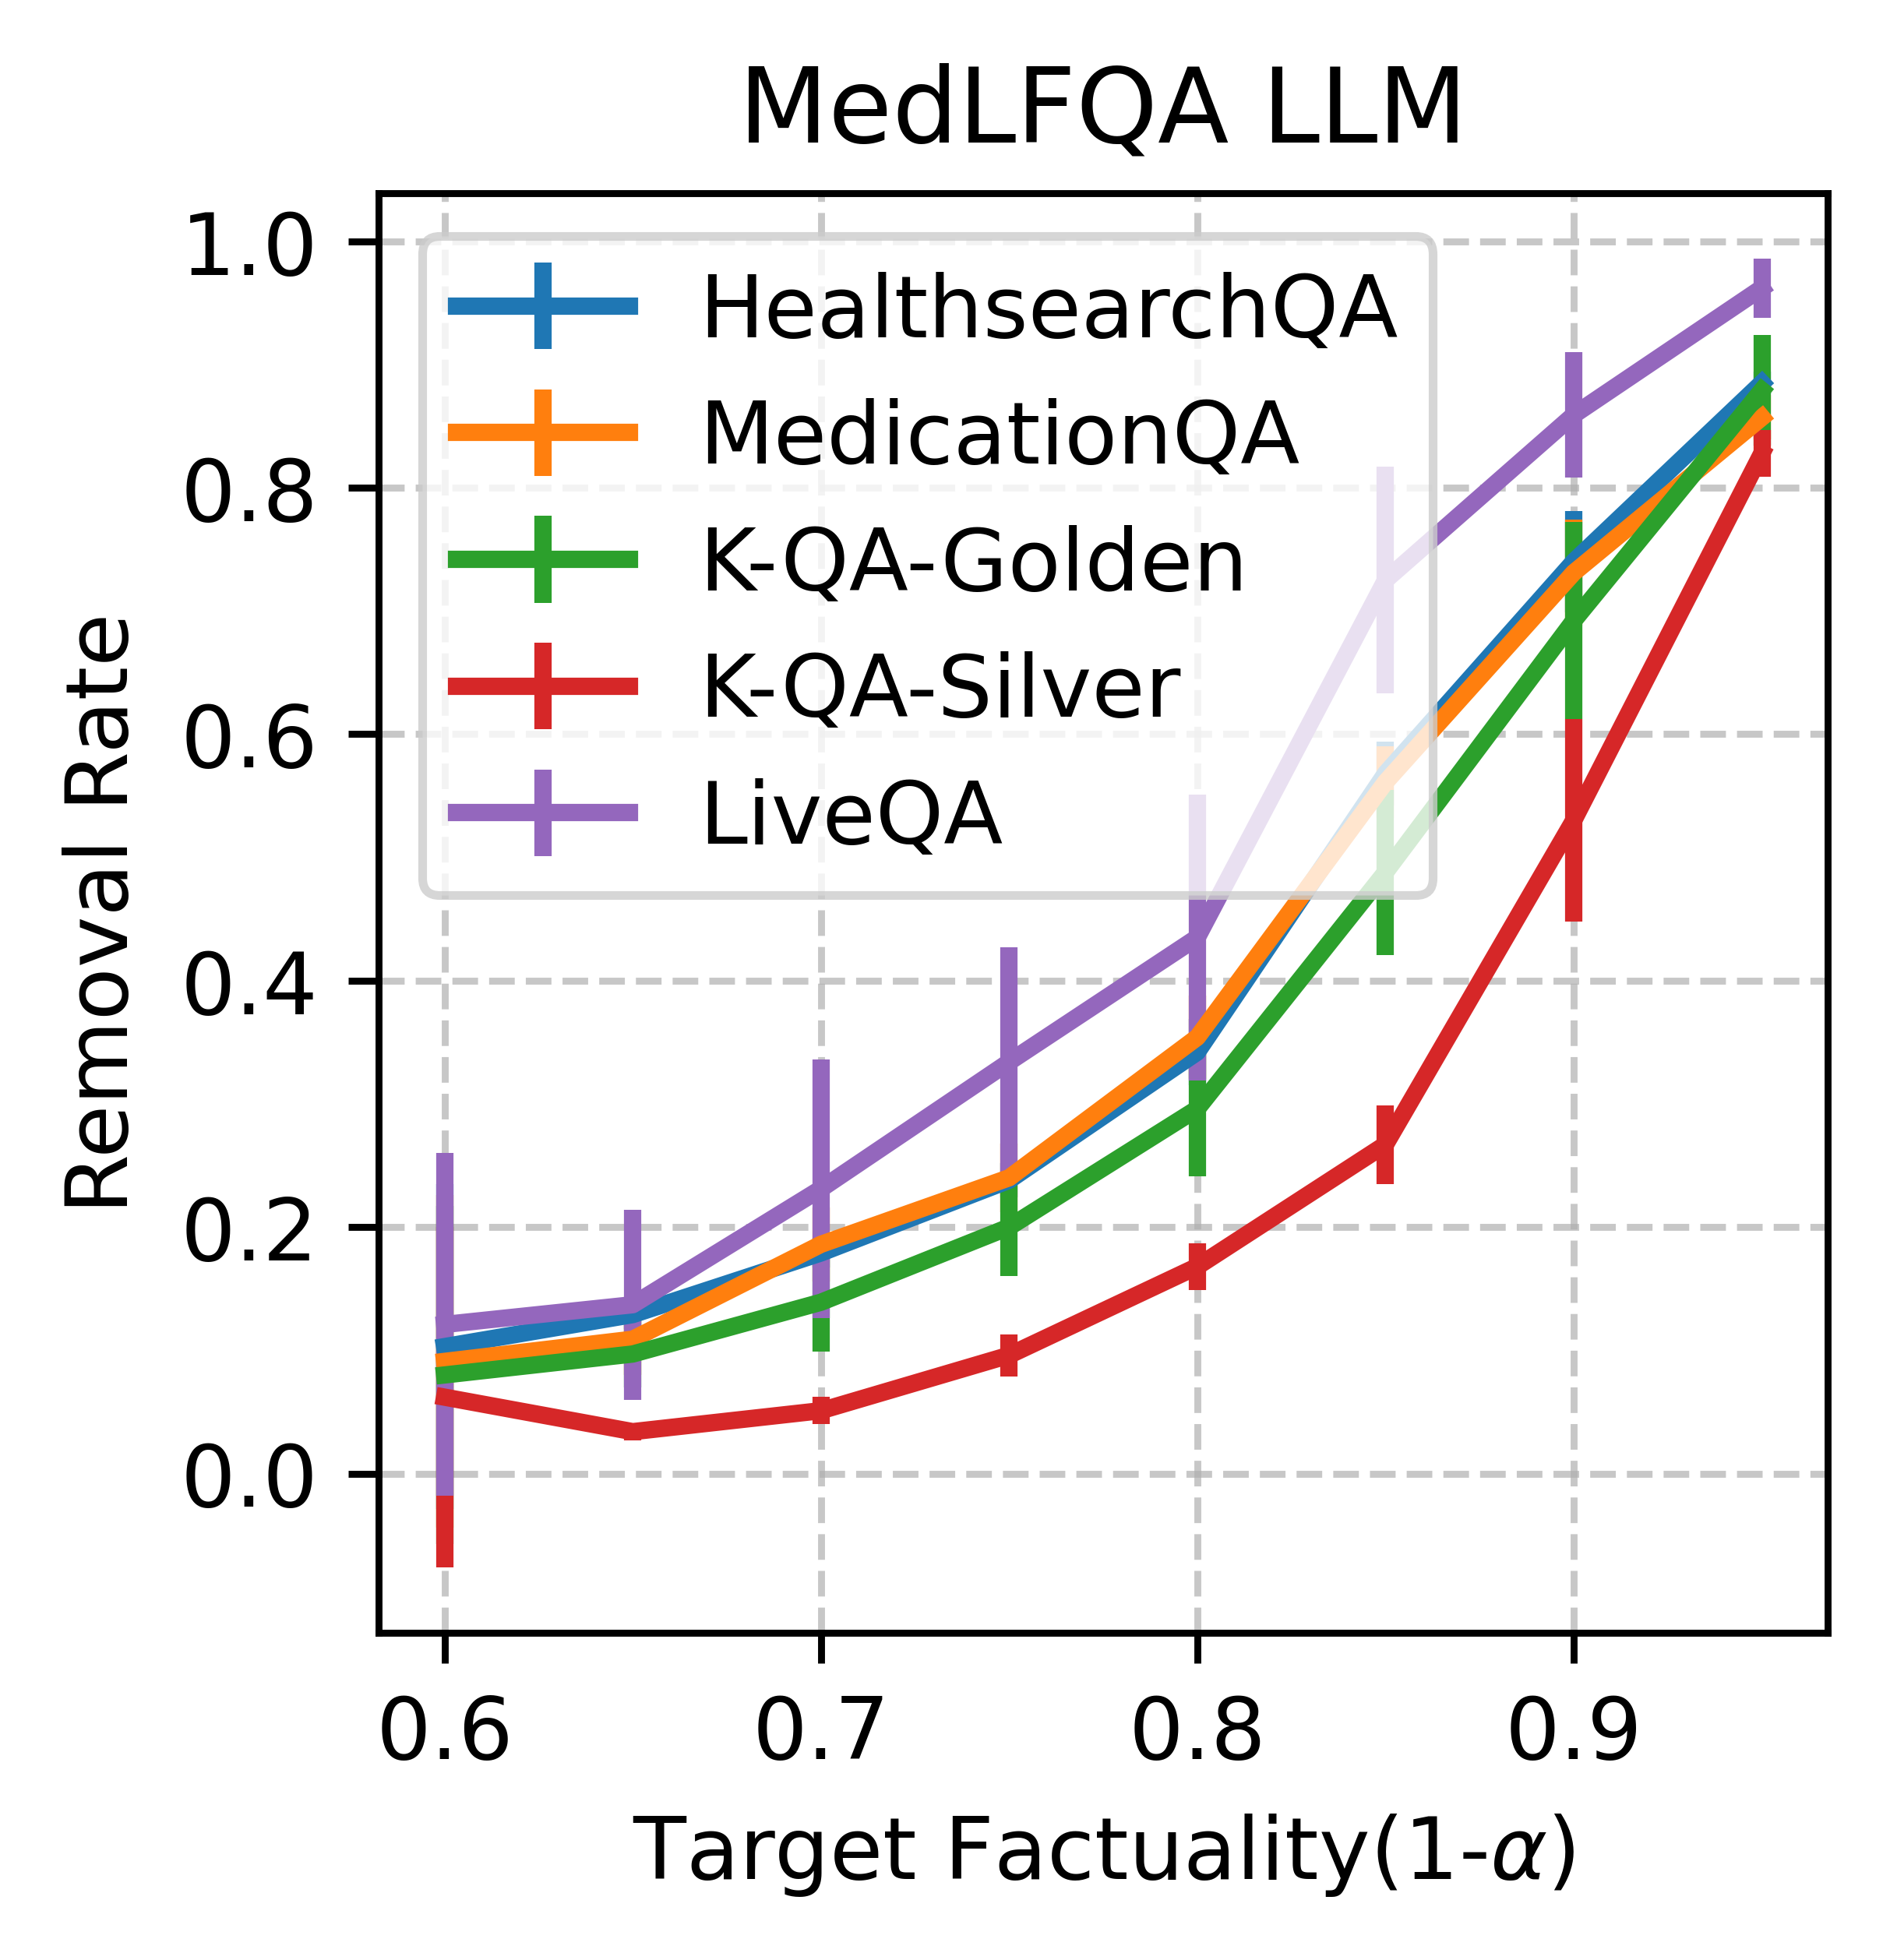

In [333]:
plot_selected_rows('/Users/naihefeng/Documents/2025/study/layer6/report/data/Removal.csv', 
                   ["Medlfqav2_Conditional_Conformal_LLM_HealthsearchQA",
                    "Medlfqav2_Conditional_Conformal_LLM_MedicationQA", 
                    "Medlfqav2_Conditional_Conformal_LLM_K-QA-Golden",
                    "Medlfqav2_Conditional_Conformal_LLM_K-QA-Silver",
                    "Medlfqav2_Conditional_Conformal_LLM_LiveQA"], "MedLFQA LLM")

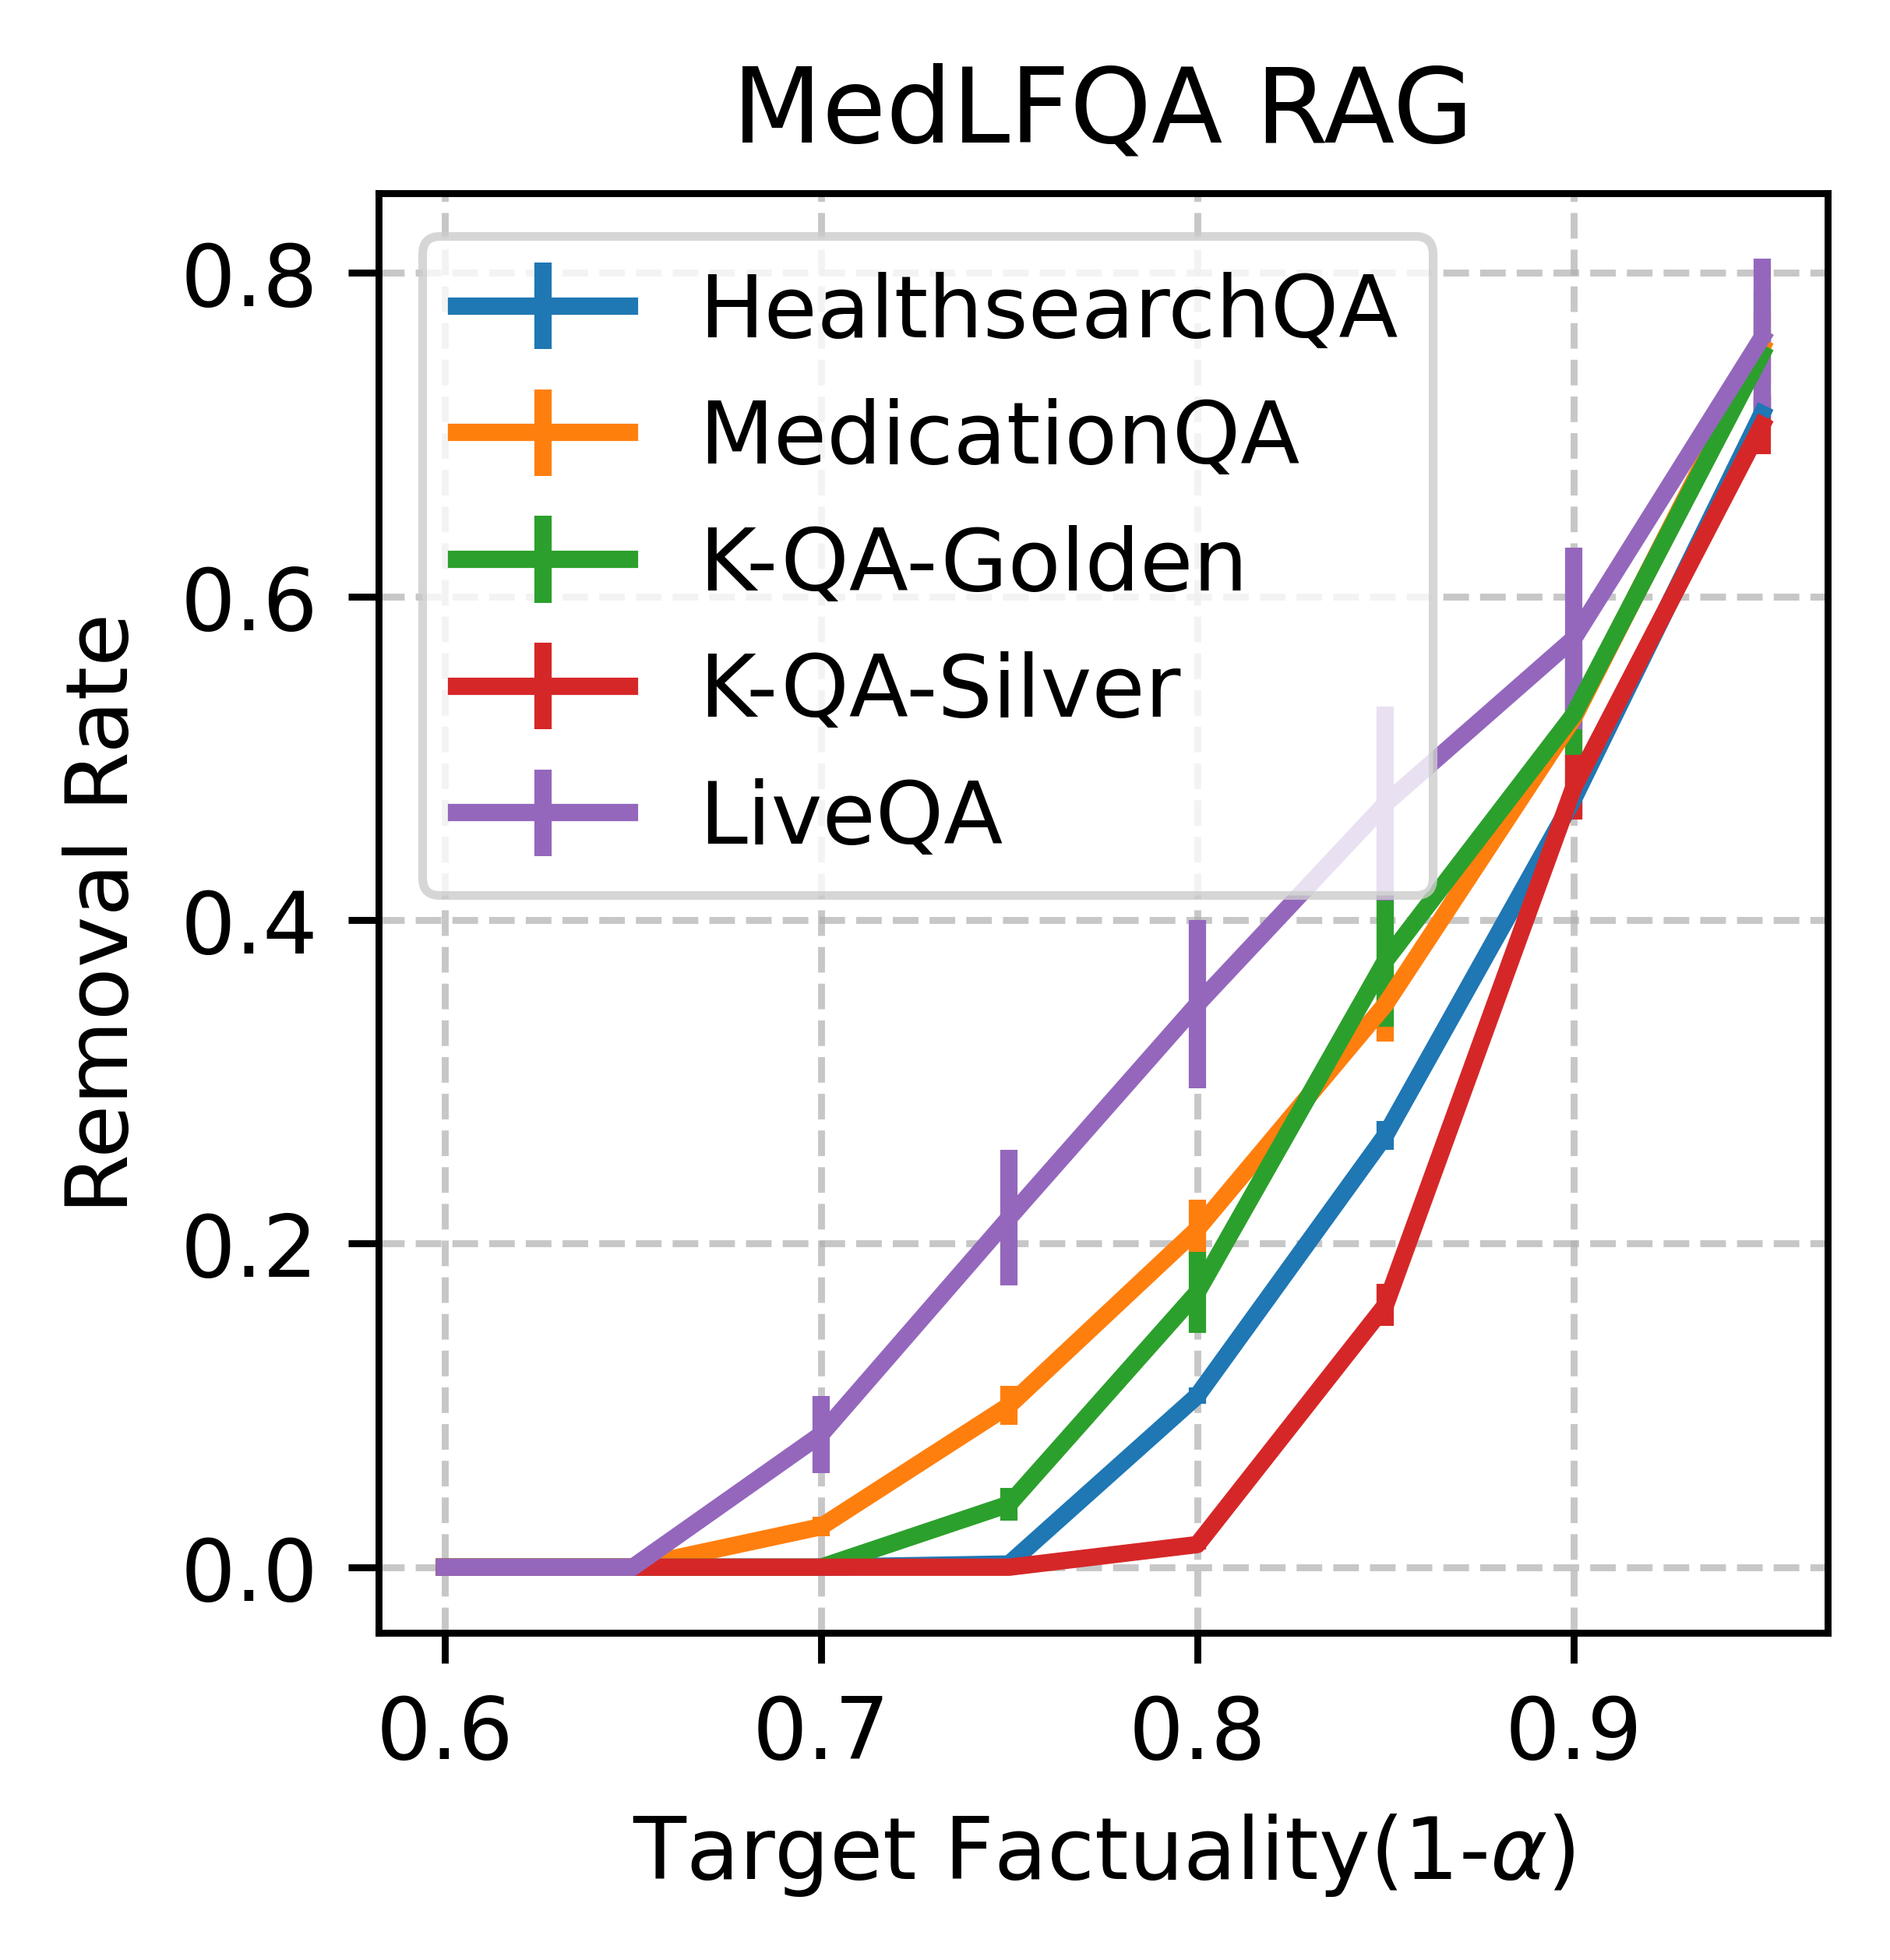

In [335]:
plot_selected_rows('/Users/naihefeng/Documents/2025/study/layer6/report/data/Removal.csv', 
                   ["Medlfqav2_Conditional_Conformal_RAG_HealthsearchQA",
                    "Medlfqav2_Conditional_Conformal_RAG_MedicationQA", 
                    "Medlfqav2_Conditional_Conformal_RAG_K-QA-Golden",
                    "Medlfqav2_Conditional_Conformal_RAG_K-QA-Silver",
                    "Medlfqav2_Conditional_Conformal_RAG_LiveQA"], "MedLFQA RAG")

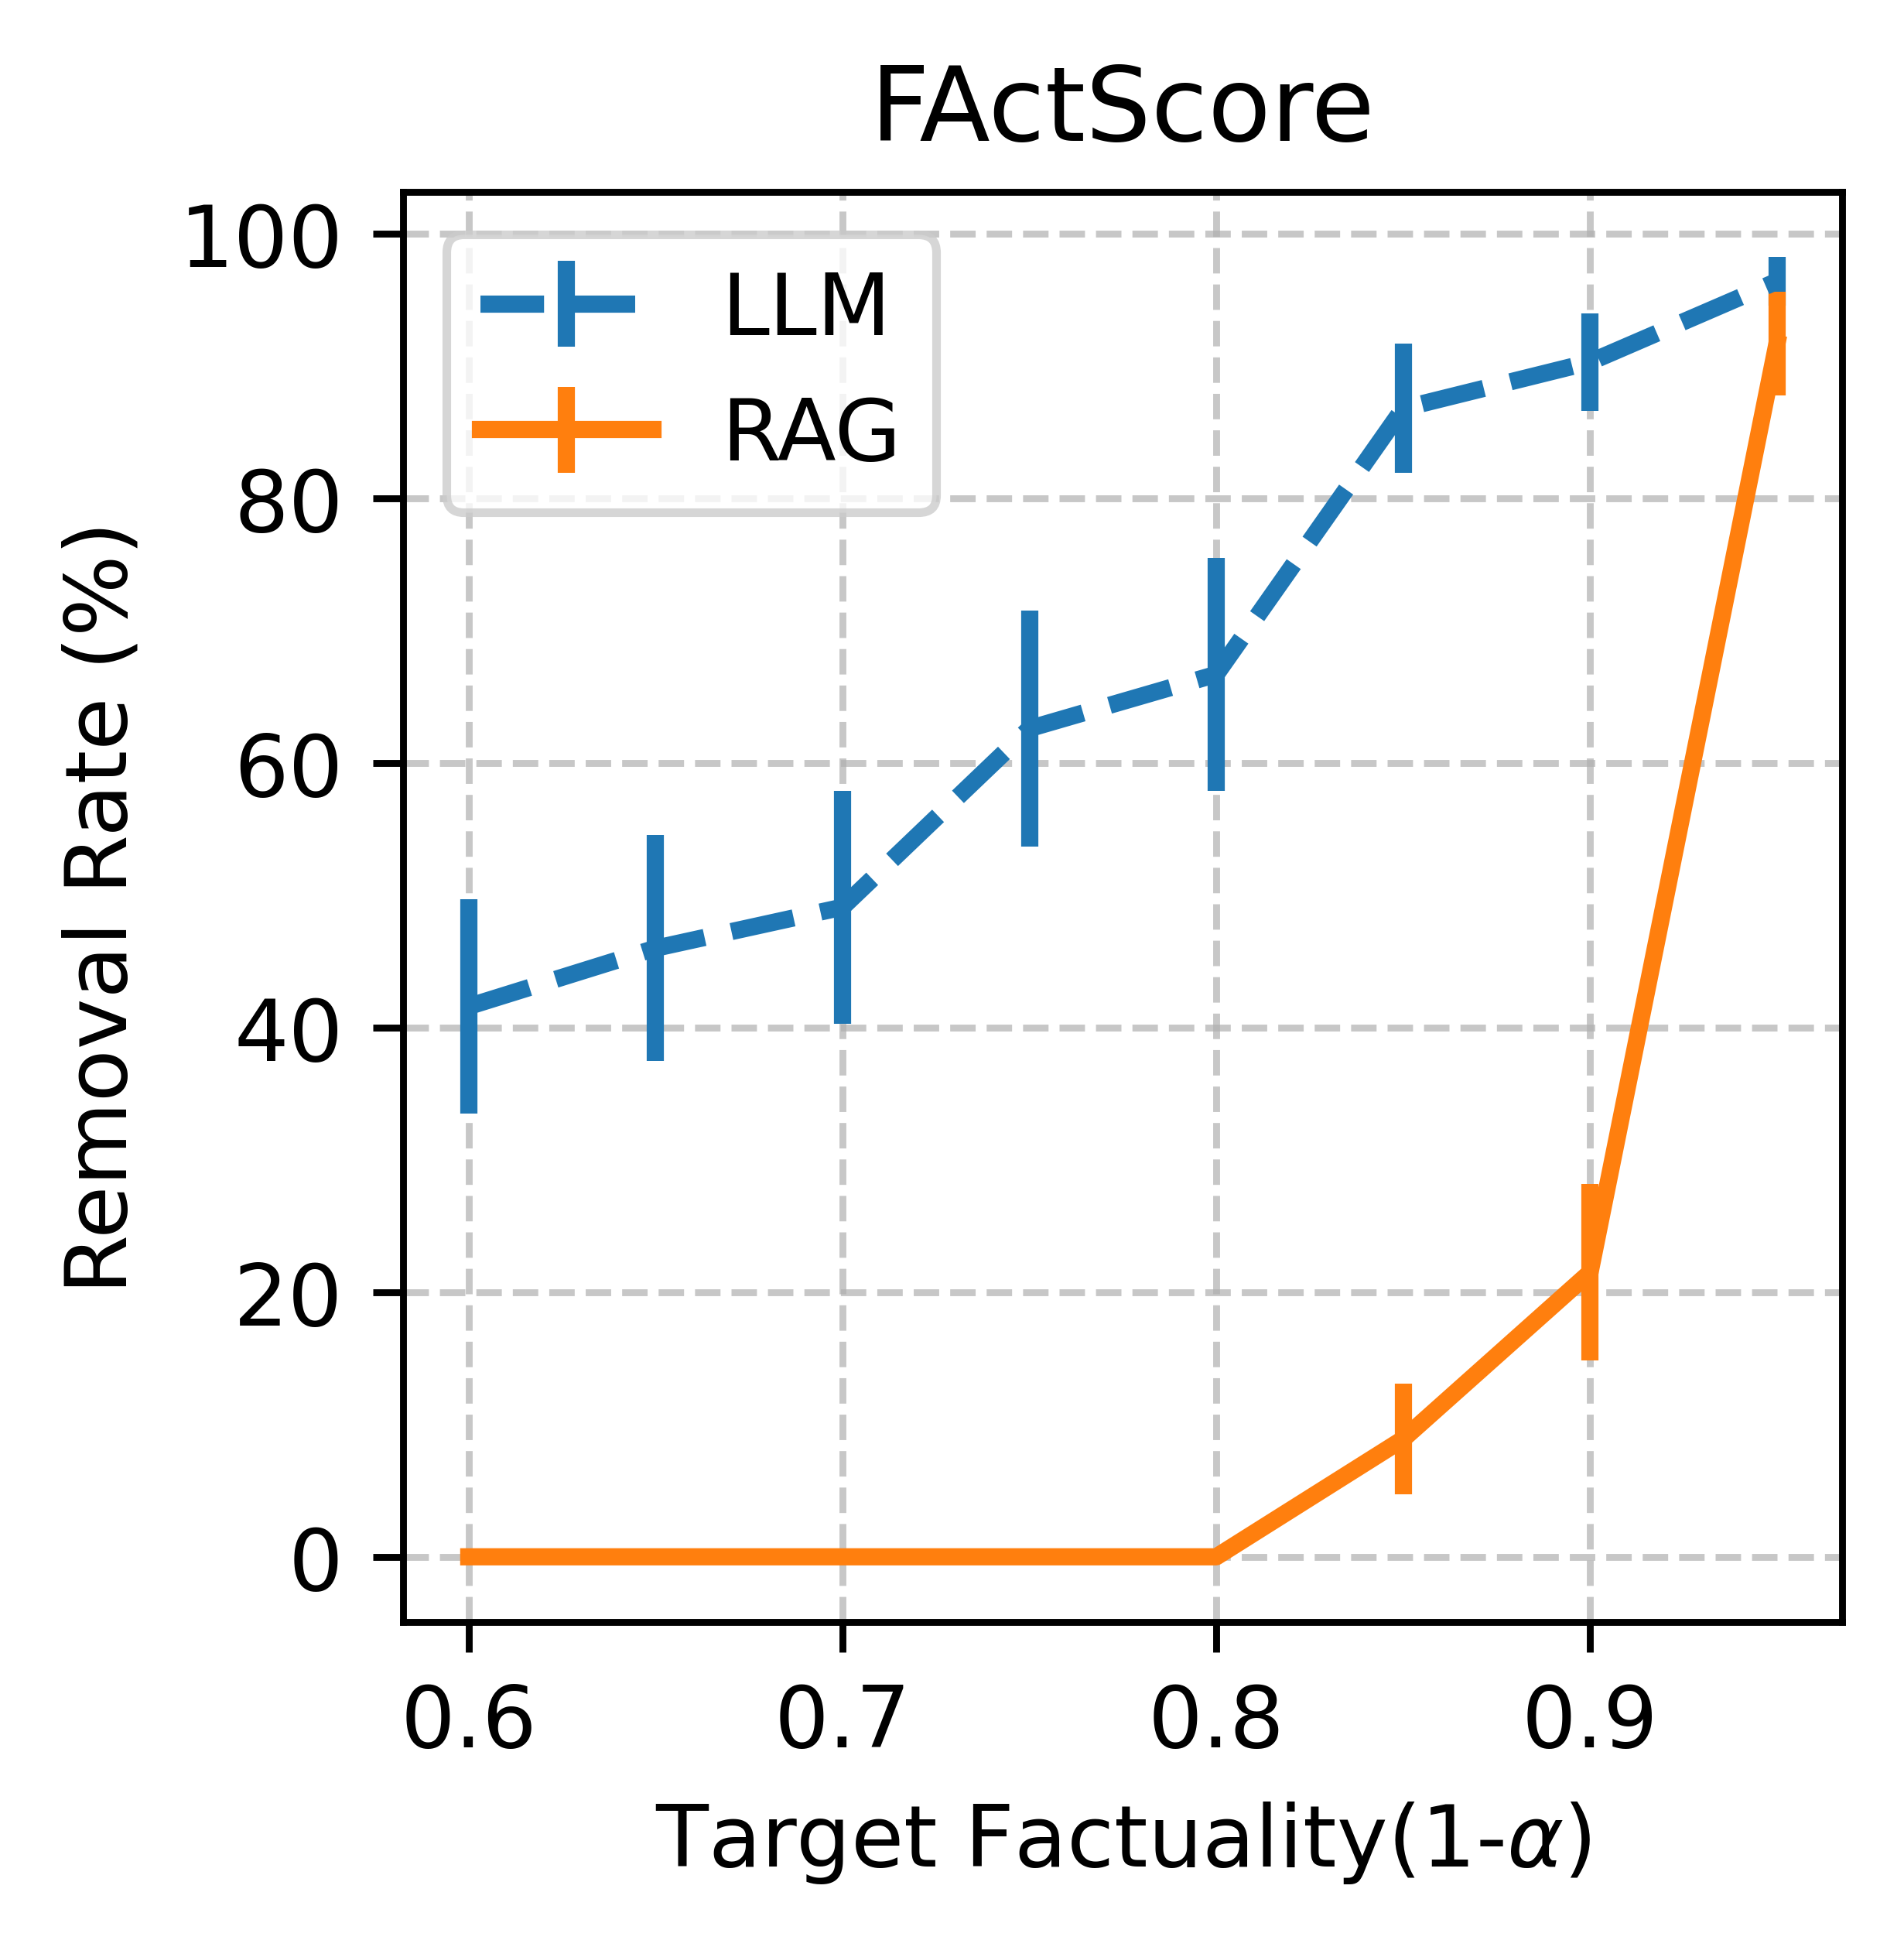

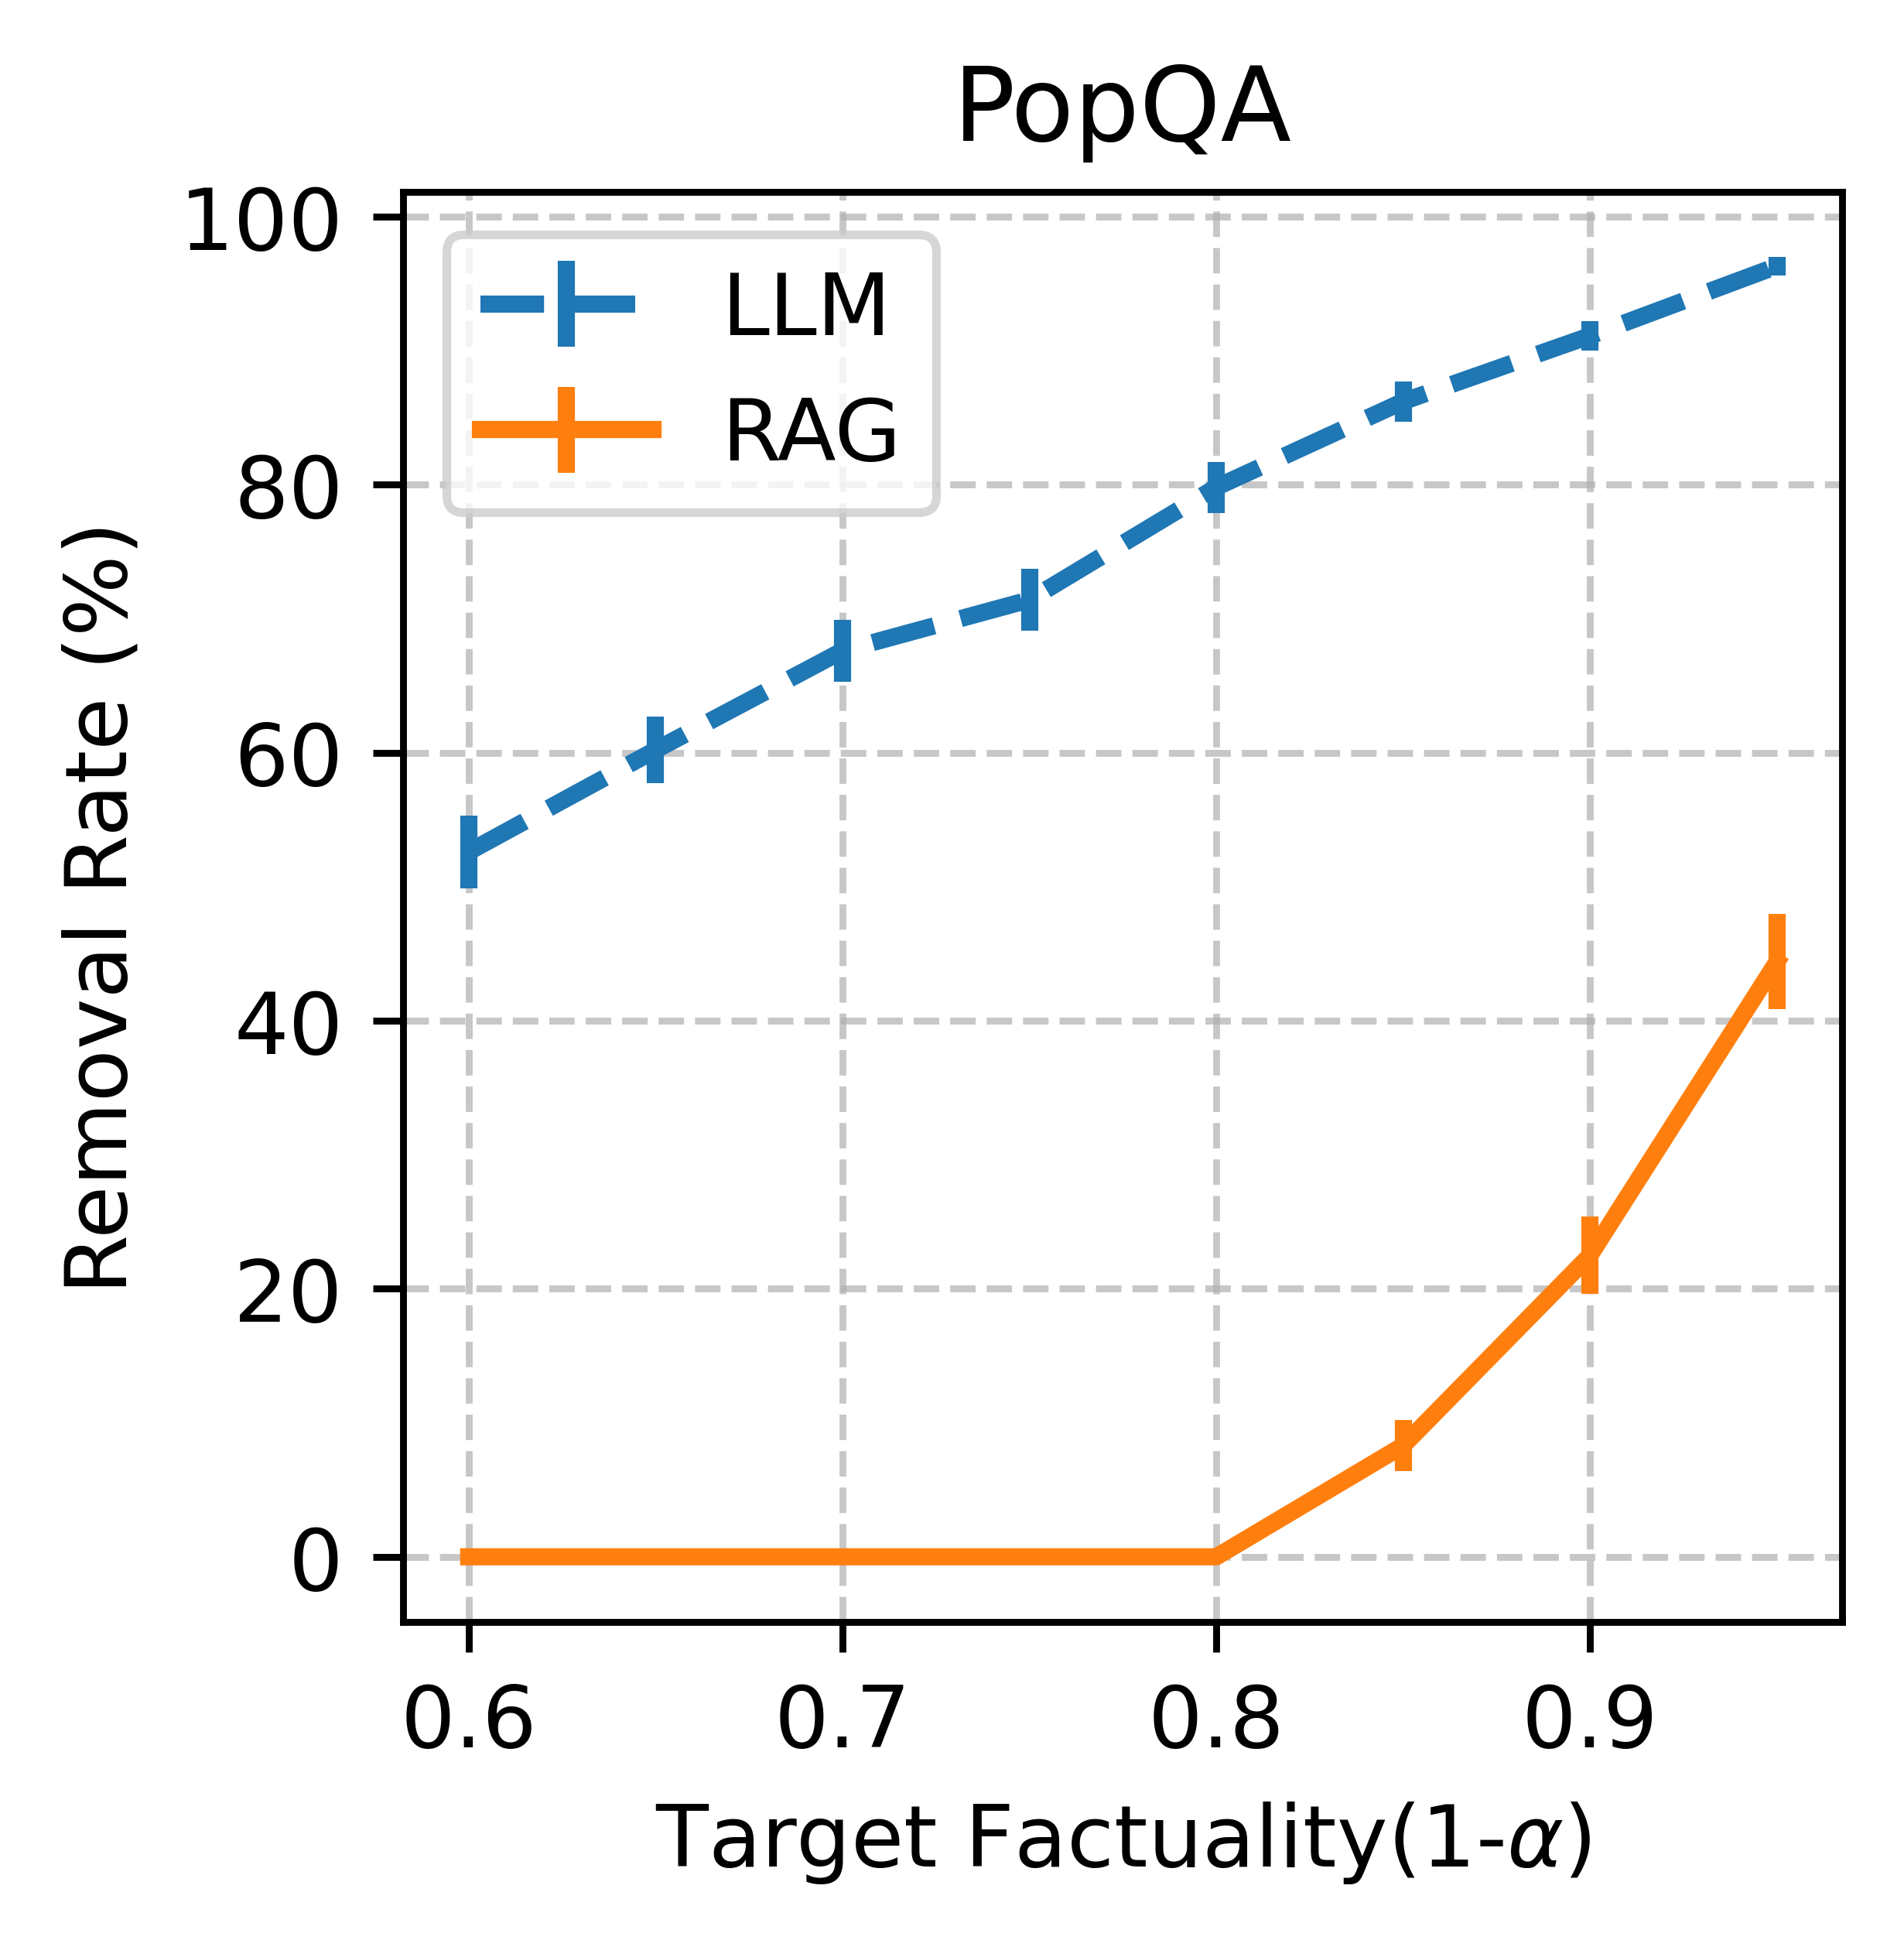

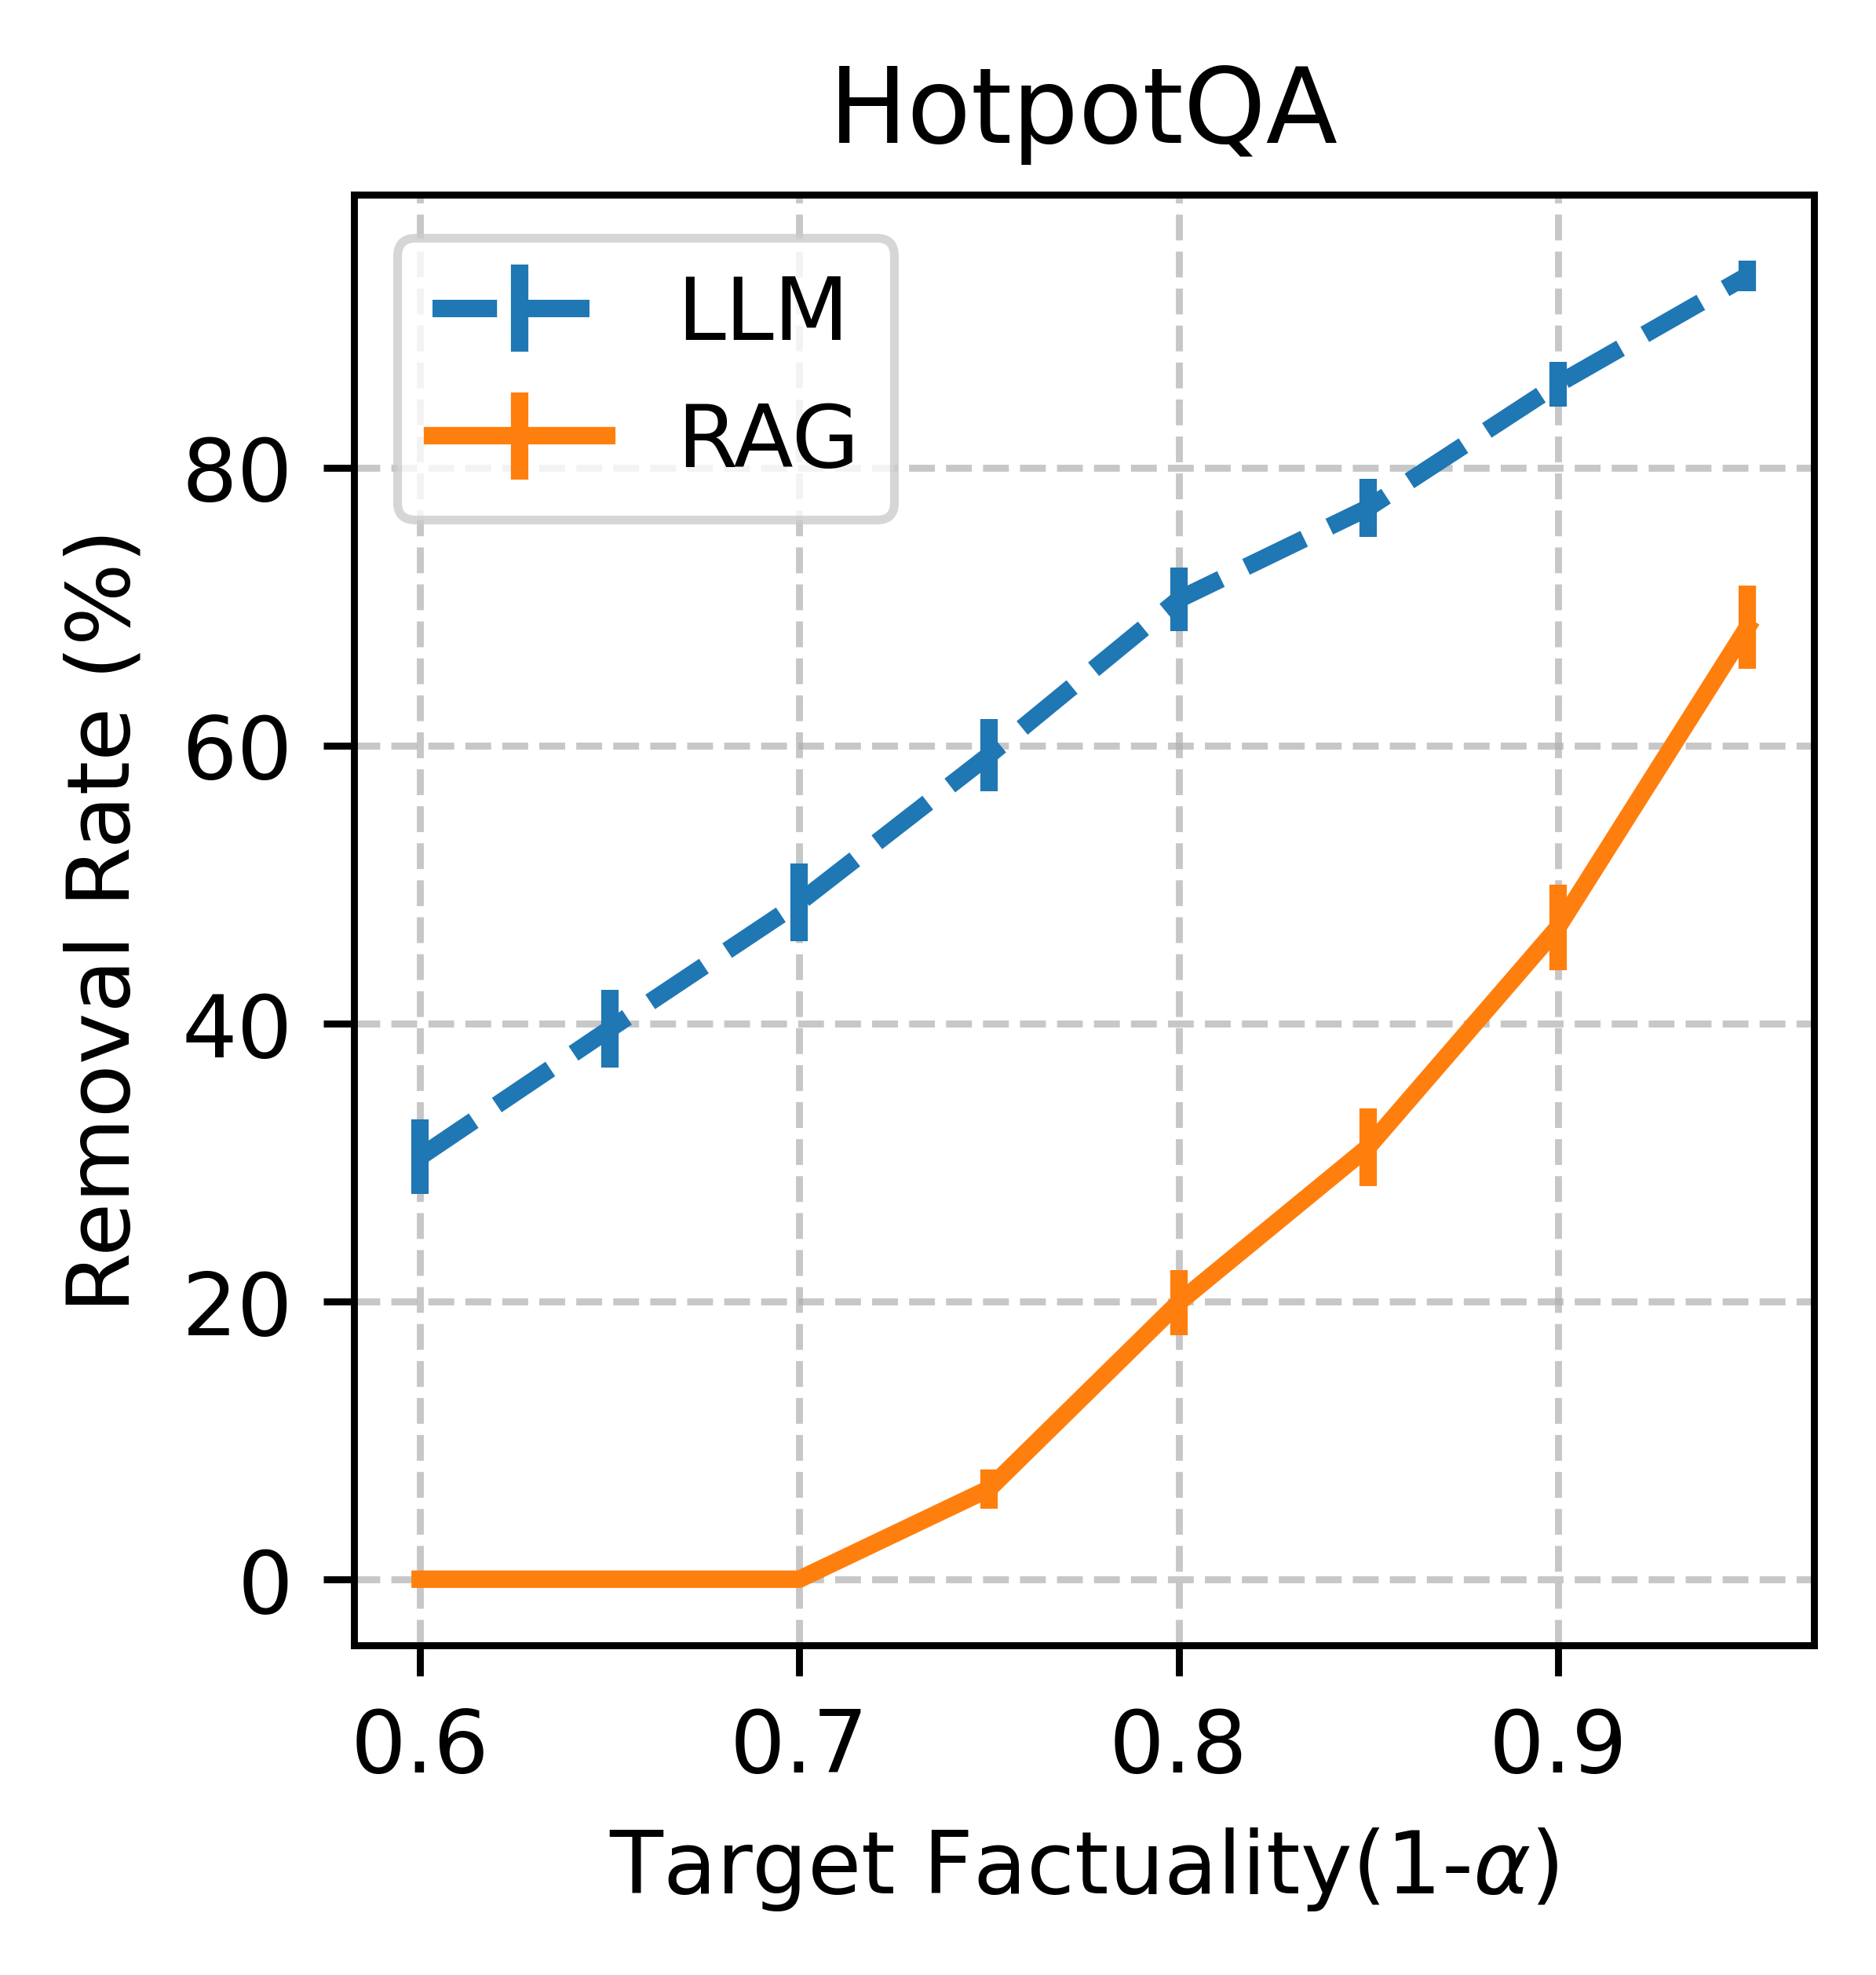

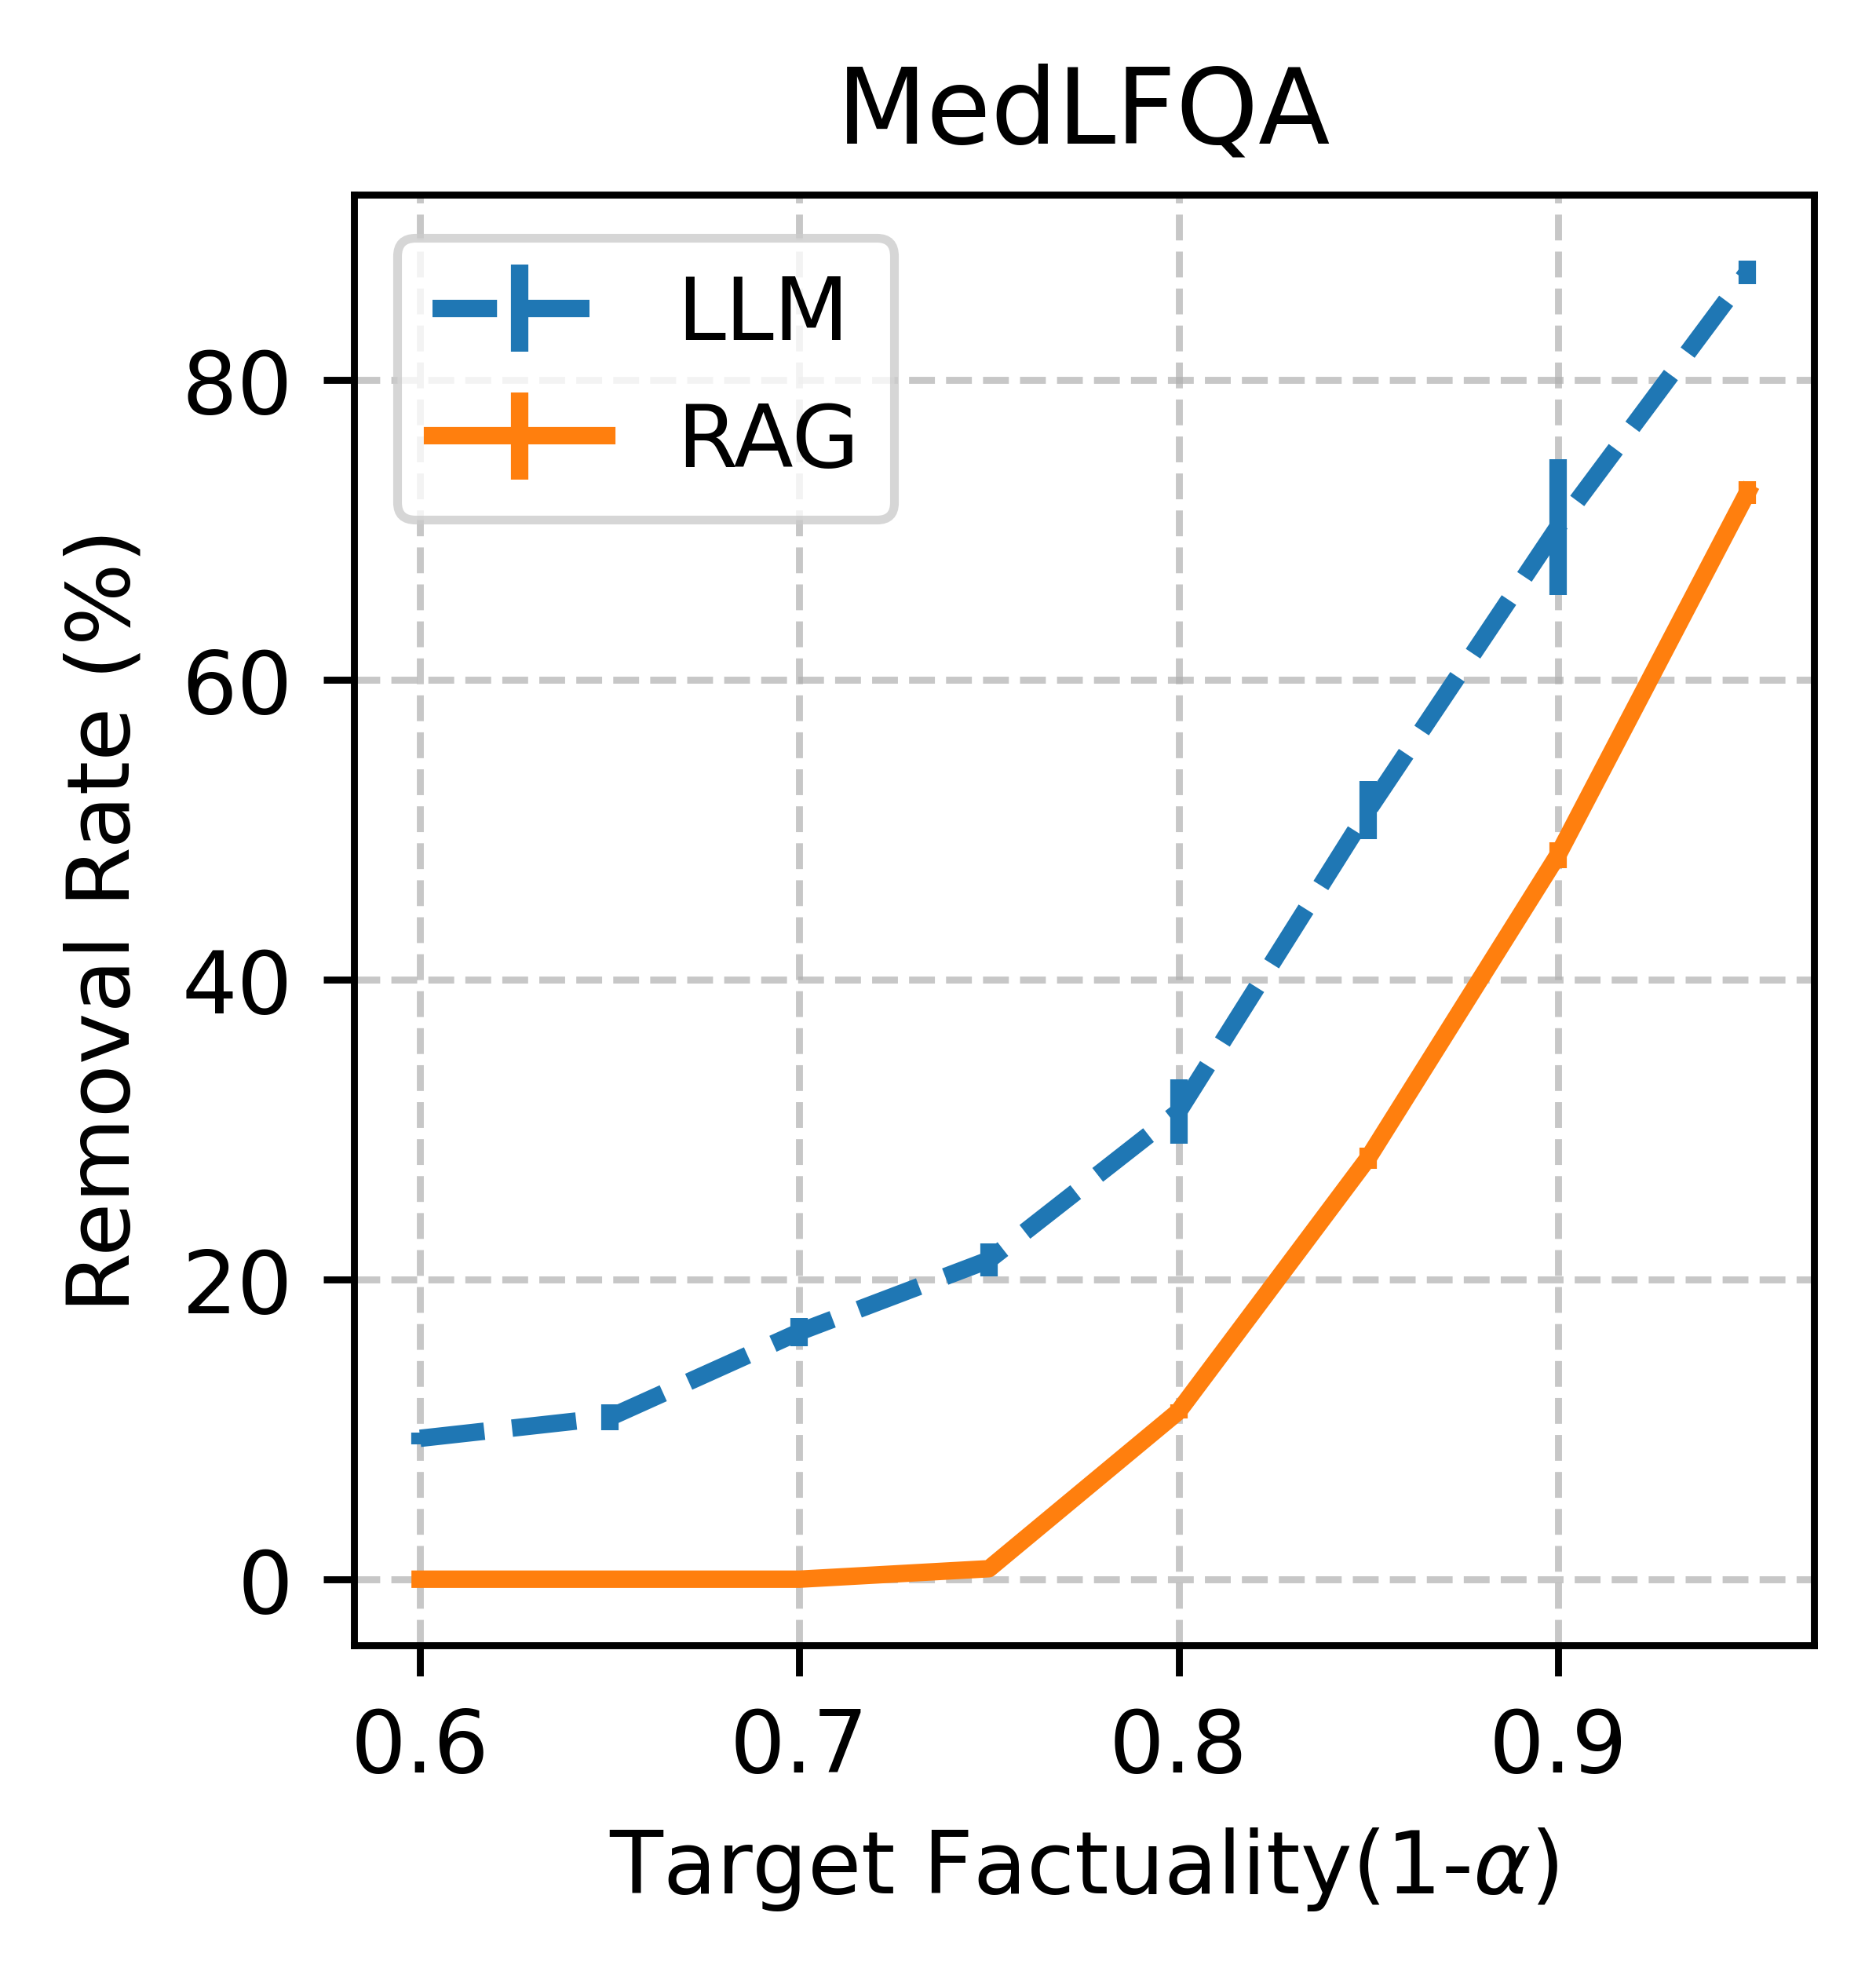

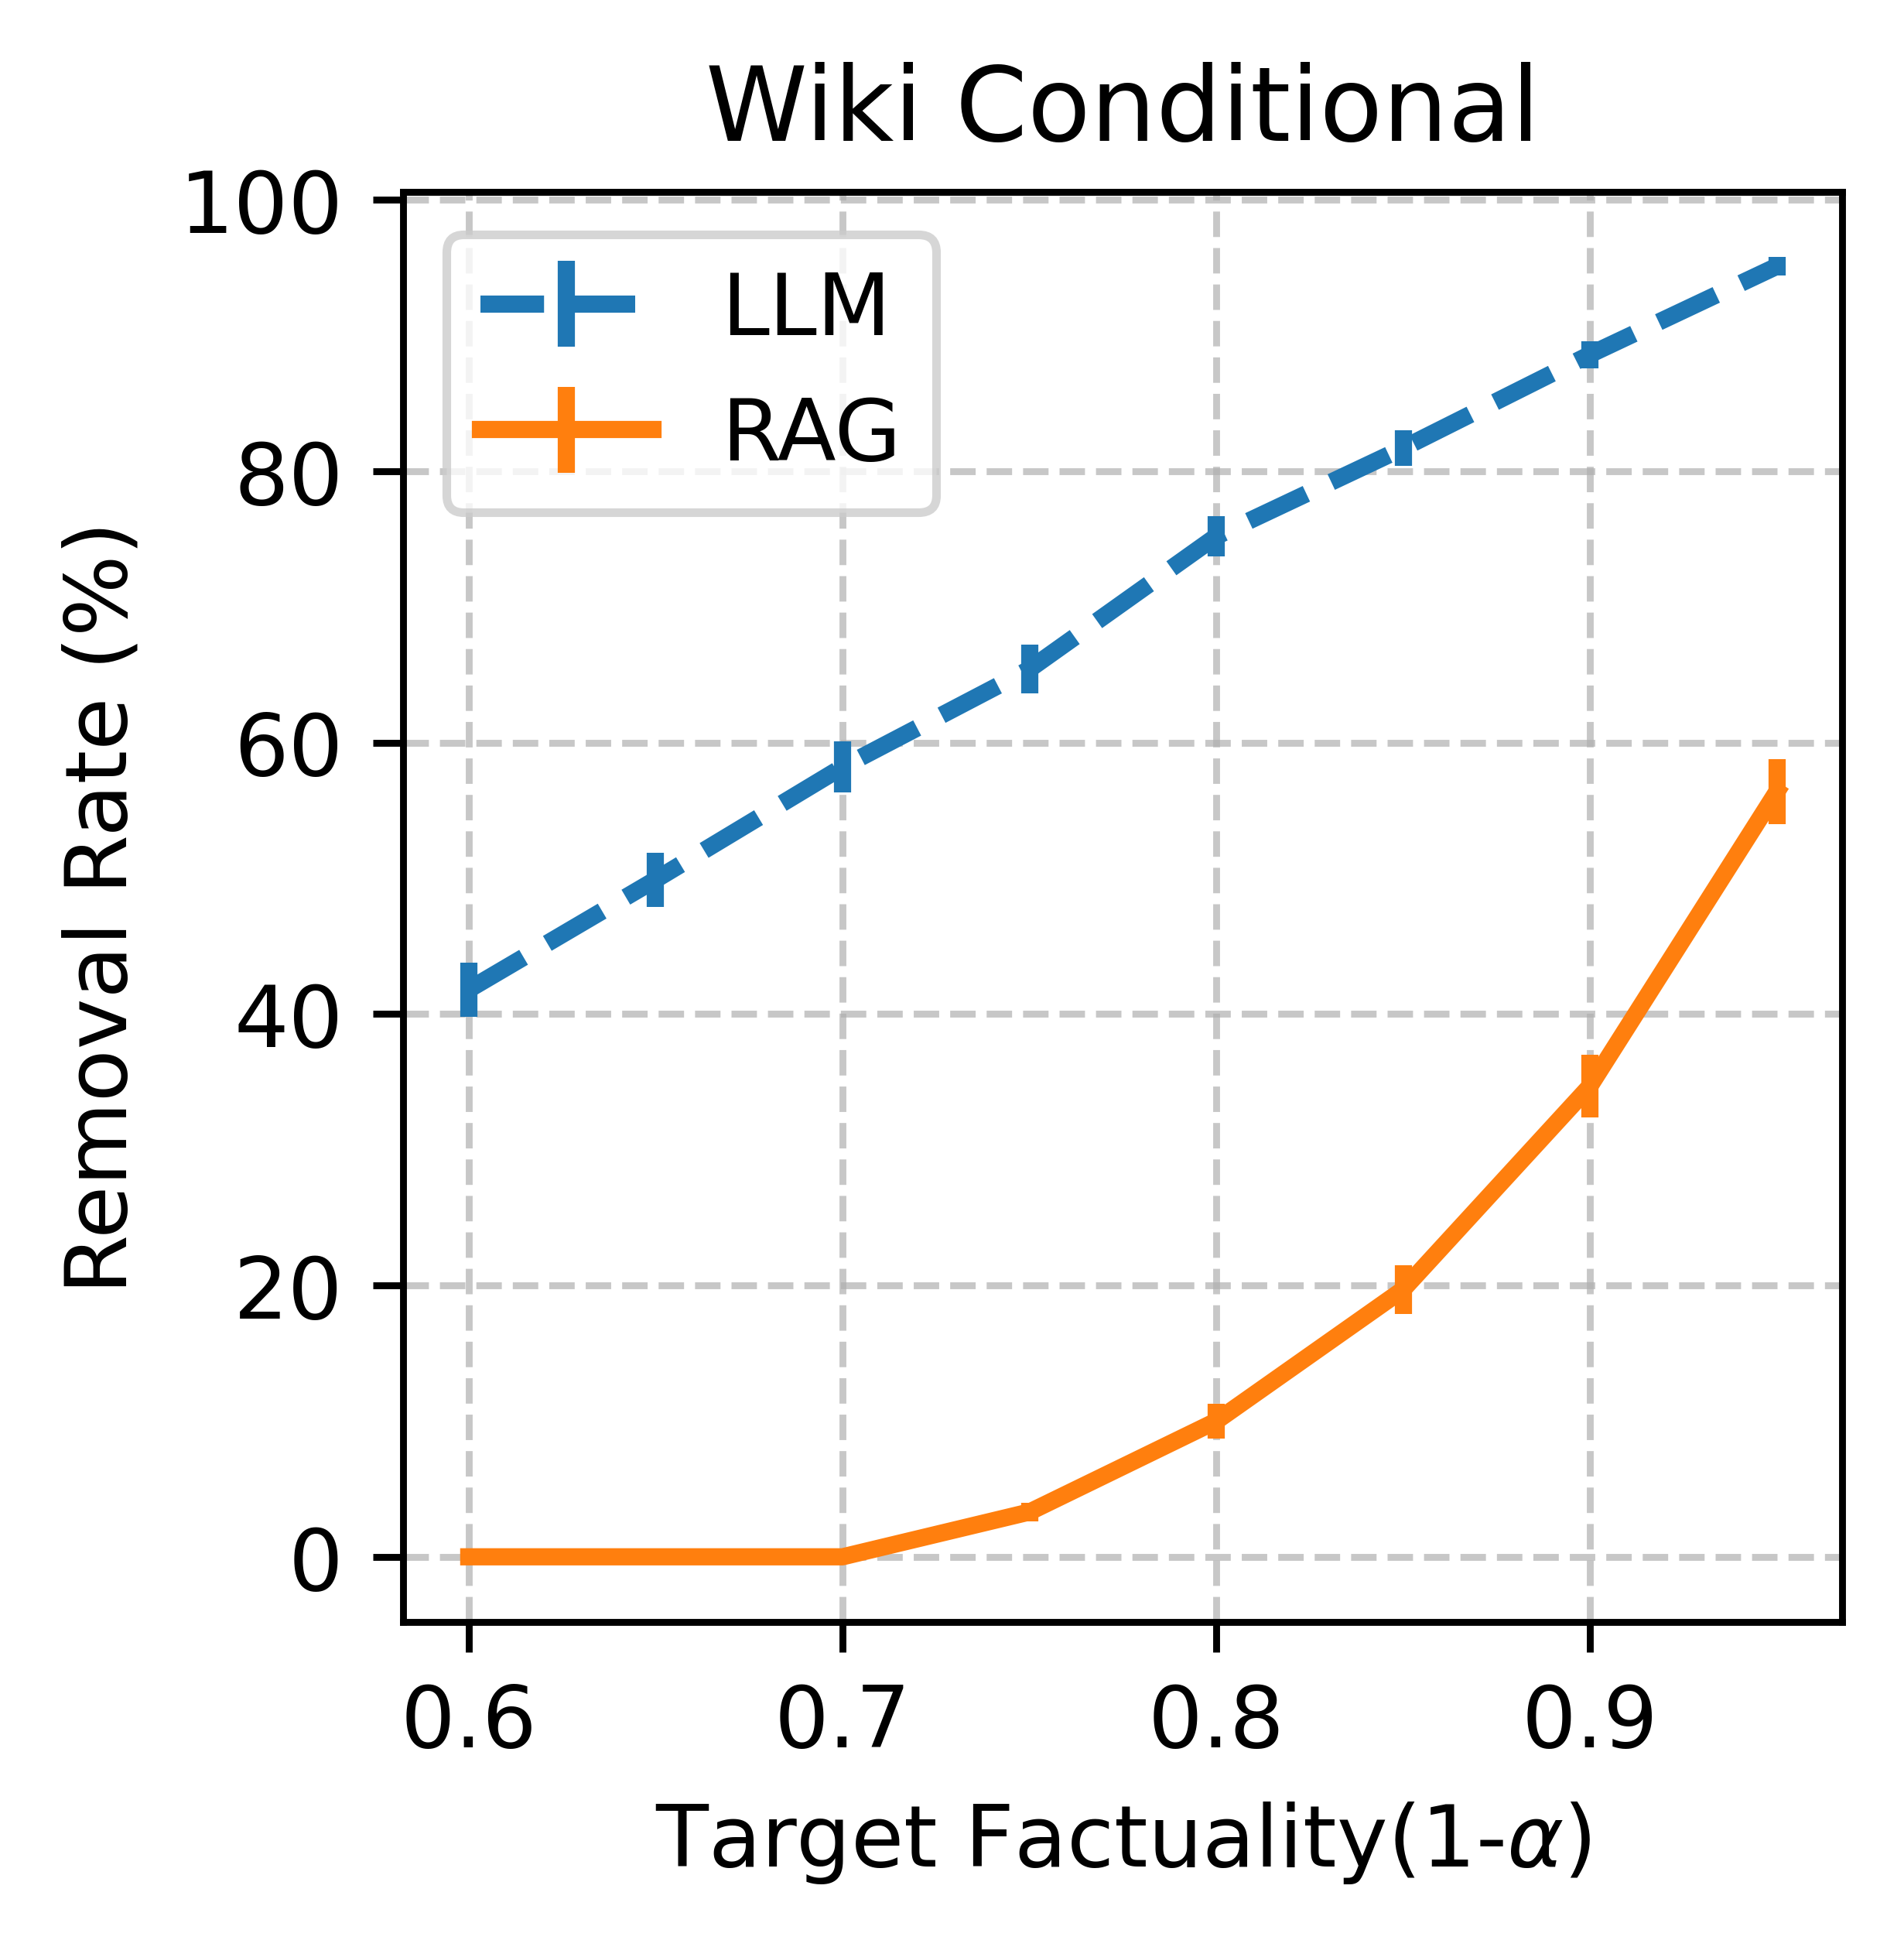

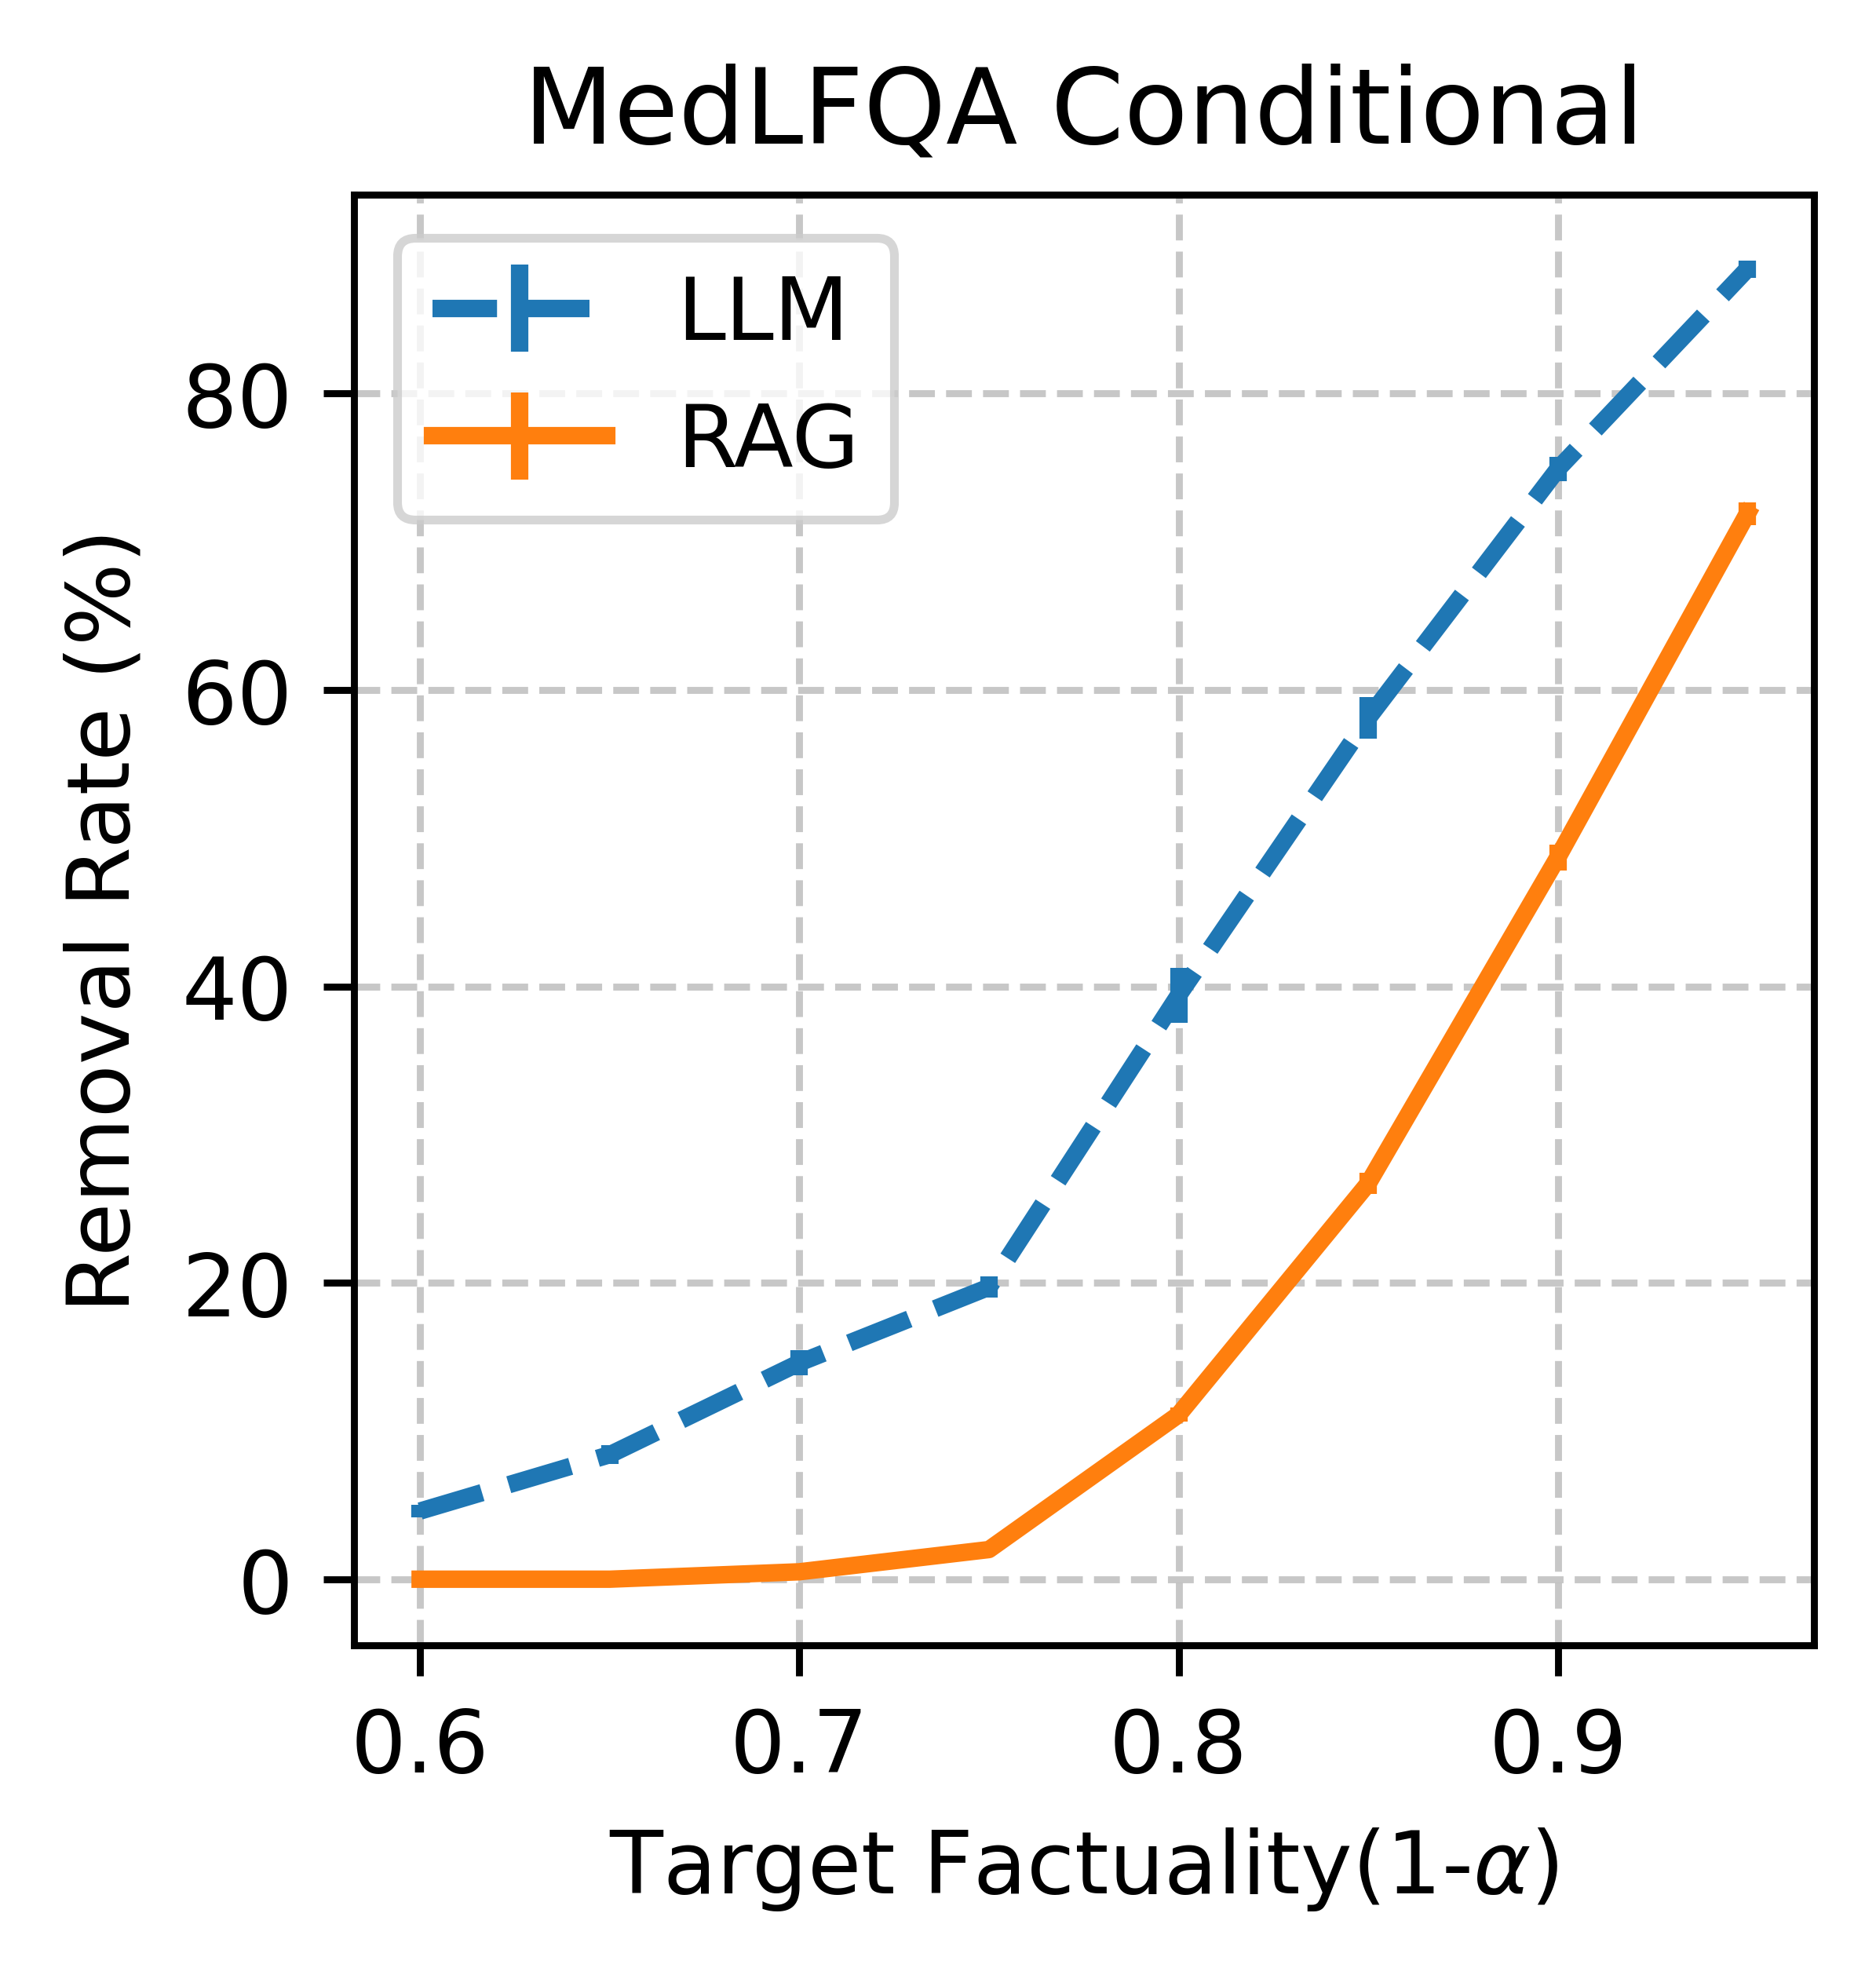

In [301]:
all = [
    ["Factscore_Conformal_LLM", "Factscore_Conformal_RAG"],
    ["Popqa_Conformal_LLM", "Popqa_Conformal_RAG"],
    ["Hotpotqa_Conformal_LLM", "Hotpotqa_Conformal_RAG"],
    ["Medlfqav2_Conformal_LLM", "Medlfqav2_Conformal_RAG"],
    ["Wiki_Conditional_Conformal_LLM", "Wiki_Conditional_Conformal_RAG"],
    ["Medlfqav2_Conditional_Conformal_LLM", "Medlfqav2_Conditional_Conformal_RAG"]
]
titles = ["FActScore", "PopQA", "HotpotQA", "MedLFQA", "Wiki Conditional", "MedLFQA Conditional"]
for i, rowname in enumerate(all):
    plot_selected_rows('/Users/naihefeng/Documents/2025/study/layer6/report/data/Removal.csv', rowname, titles[i])

In [305]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def plot_selected_rows_factuality(csv_path, selected_rows, title=None):
    df = pd.read_csv(csv_path)
    df.set_index("dataset", inplace=True)
    
    # Extract numerical values from "mean ± std" format
    def extract_mean(value):
        return float(re.split(r"\s*±\s*", str(value))[0])
    
    def extract_std(value):
        return float(re.split(r"\s*±\s*", str(value))[1])
    
    factuality_levels = df.columns.tolist()
    factuality_levels = [float(level) for level in factuality_levels]  # Convert to float
    
    plt.figure(figsize=(3,3),dpi=800)
    # Plot lower bound. adjust down slightly for better visualization
    y_values = [factual*100 - 0.3 for factual in factuality_levels]
    plt.plot(
        factuality_levels, y_values, linestyle='--', marker='o', color='r', linewidth=1
    )
    for dataset in selected_rows:

        if dataset in df.index:
            mean_values = [y*100 for y in df.loc[dataset].apply(extract_mean).values]
            error  = [y_error*100 for y_error in df.loc[dataset].apply(extract_std).values]
            # remove first word and _ before first _ in dataset name
            # label = re.sub(r'^[^_]+_', '', dataset)
            # remove all words and _ before 3rd _ in dataset name
            label = re.sub(r'^(?:[^_]+_){2}', '', dataset).replace("Conformal_","").replace("Conditional_","").replace("_", " ")

            if "LLM" in dataset:
                #plot with dashed line
                plt.plot(factuality_levels, mean_values, "--", label=label, linewidth=2)
            else:    
                plt.plot(factuality_levels, mean_values, label=label, linewidth=2)
    
    plt.xlabel(r"Target Factuality(1-$\alpha$)")
    plt.ylabel("Empirical Factuality (%)")
    plt.title(title)
    plt.legend(loc="upper left")

    filerow = csv_path.split("/")[-1].replace(".csv", "")
    rownames = "_".join(selected_rows)

    plt.tight_layout()
    plt.savefig(f"Factuality_{title}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

# Example usage:
# plot_selected_rows("all_a=1.00_removal_conditional.csv", ["Popqa_LLM", "Hotpotqa_LLM"])


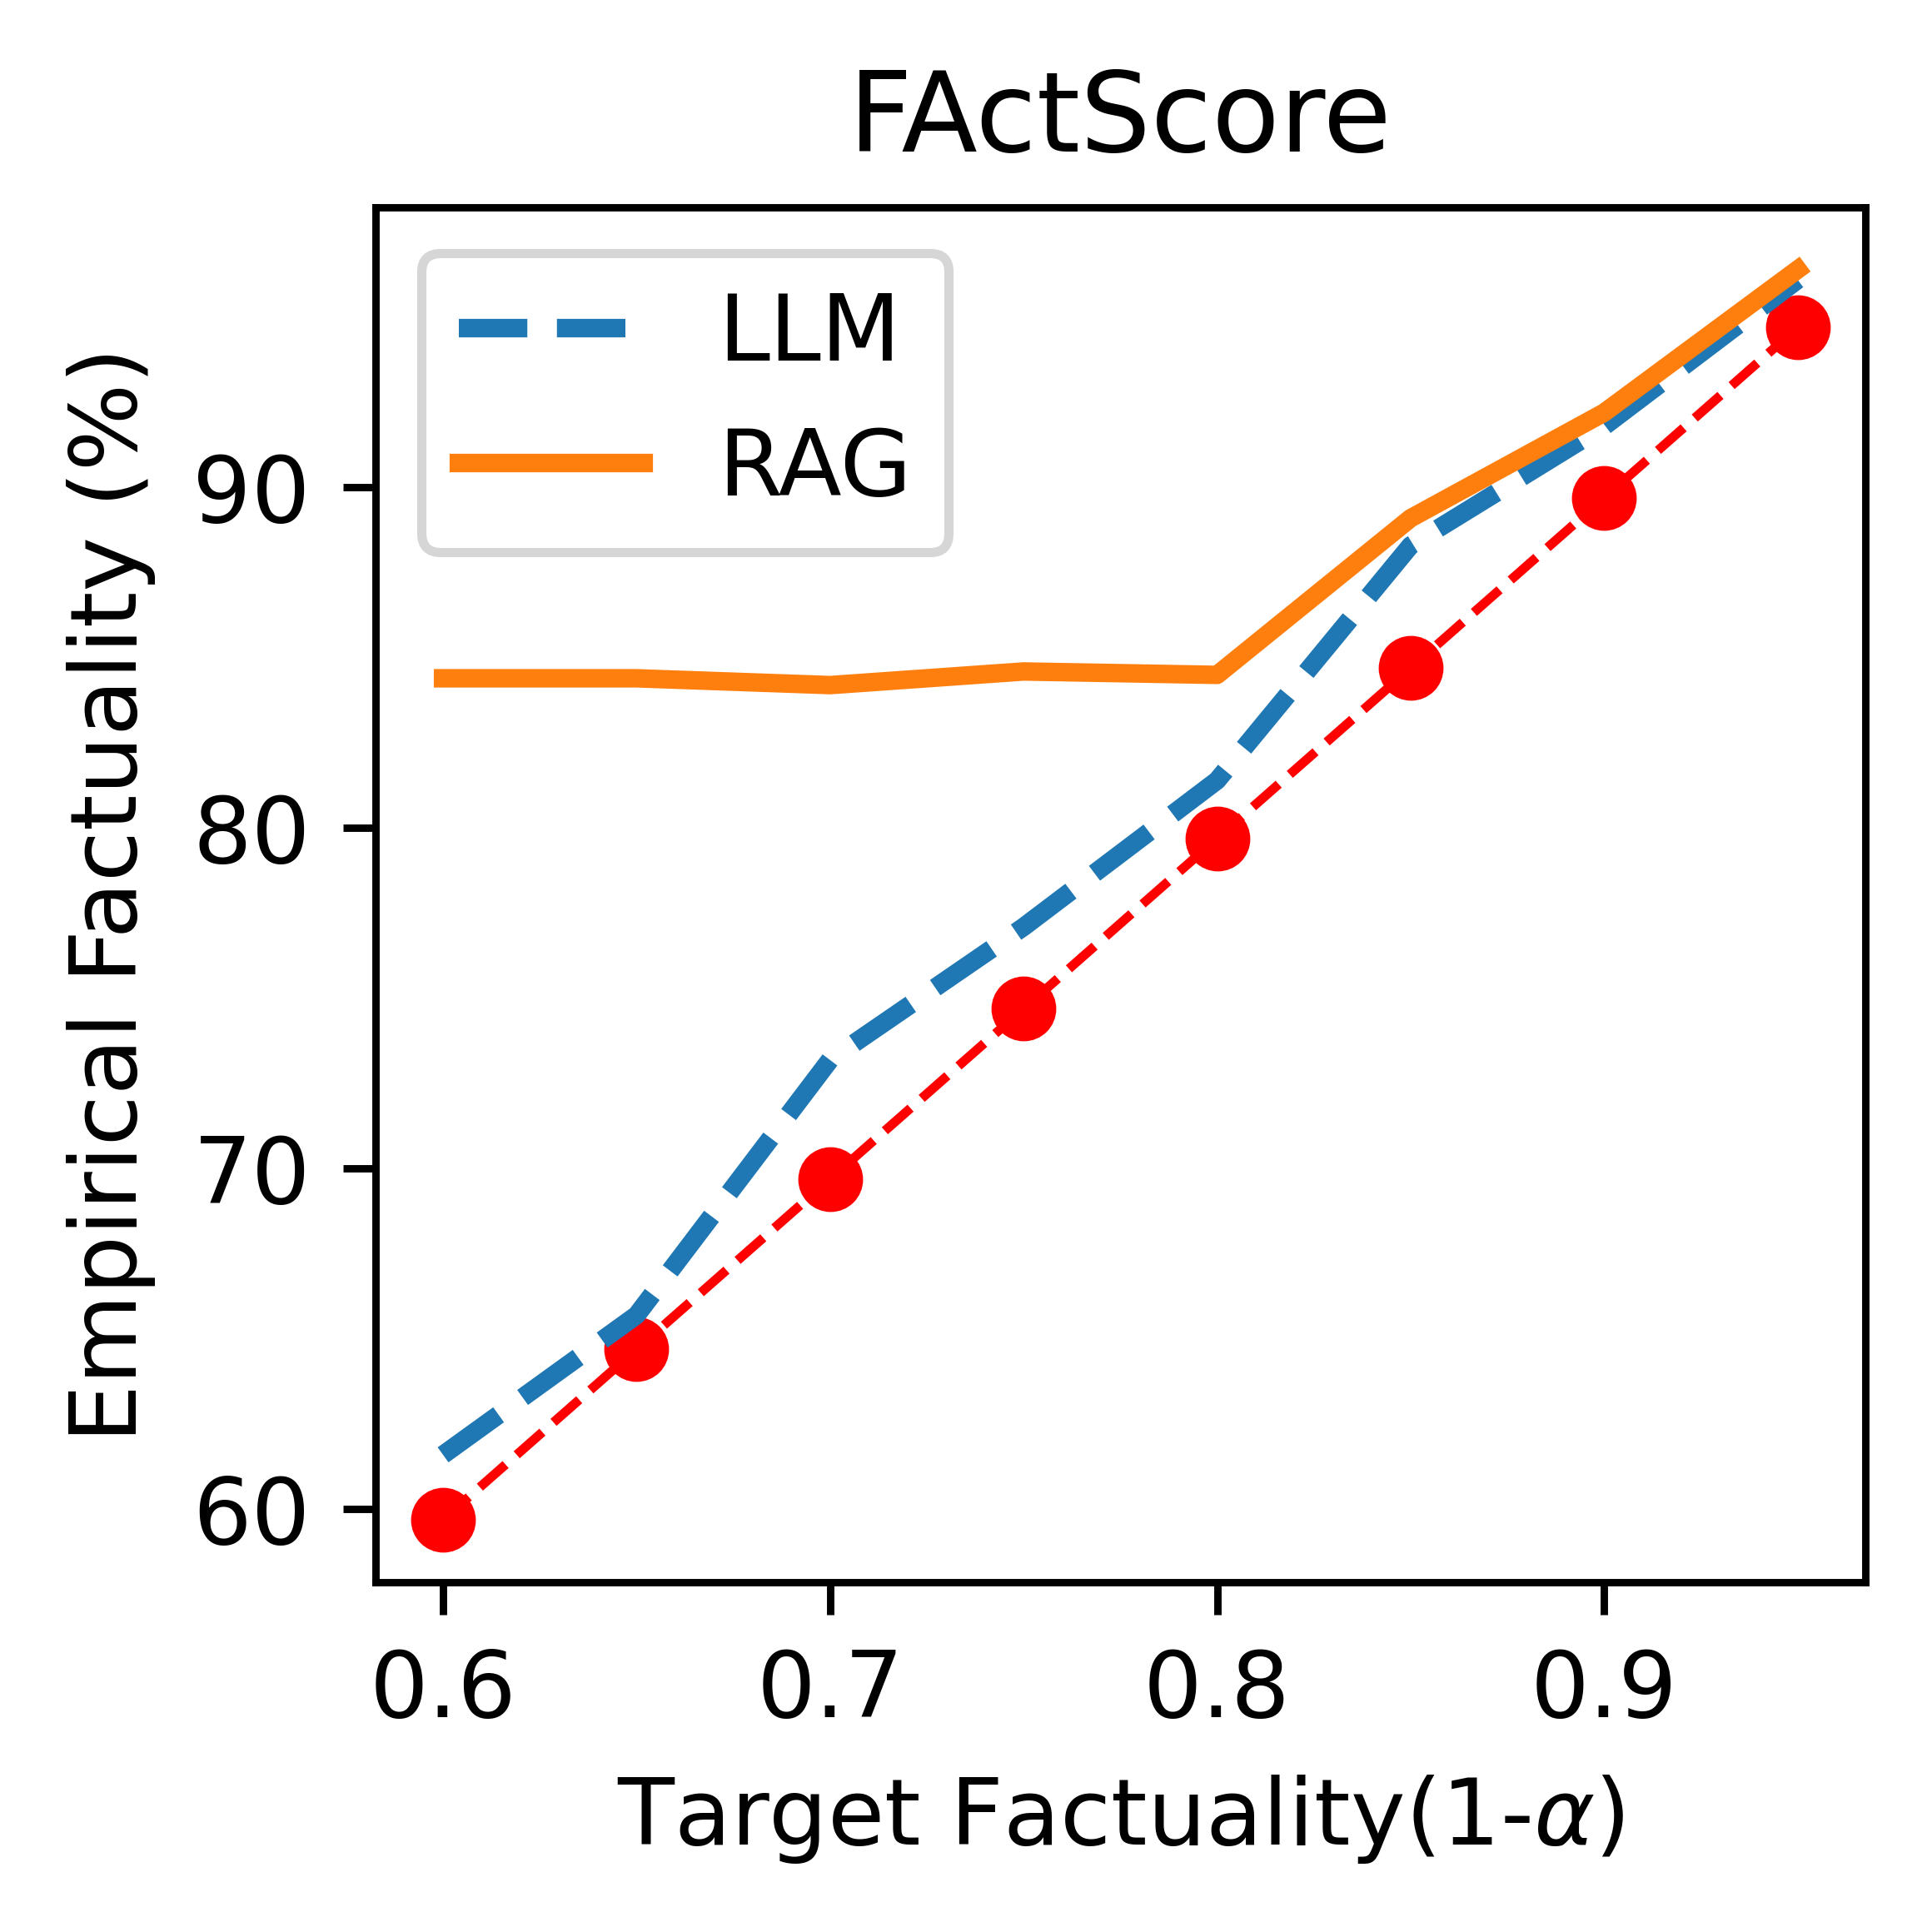

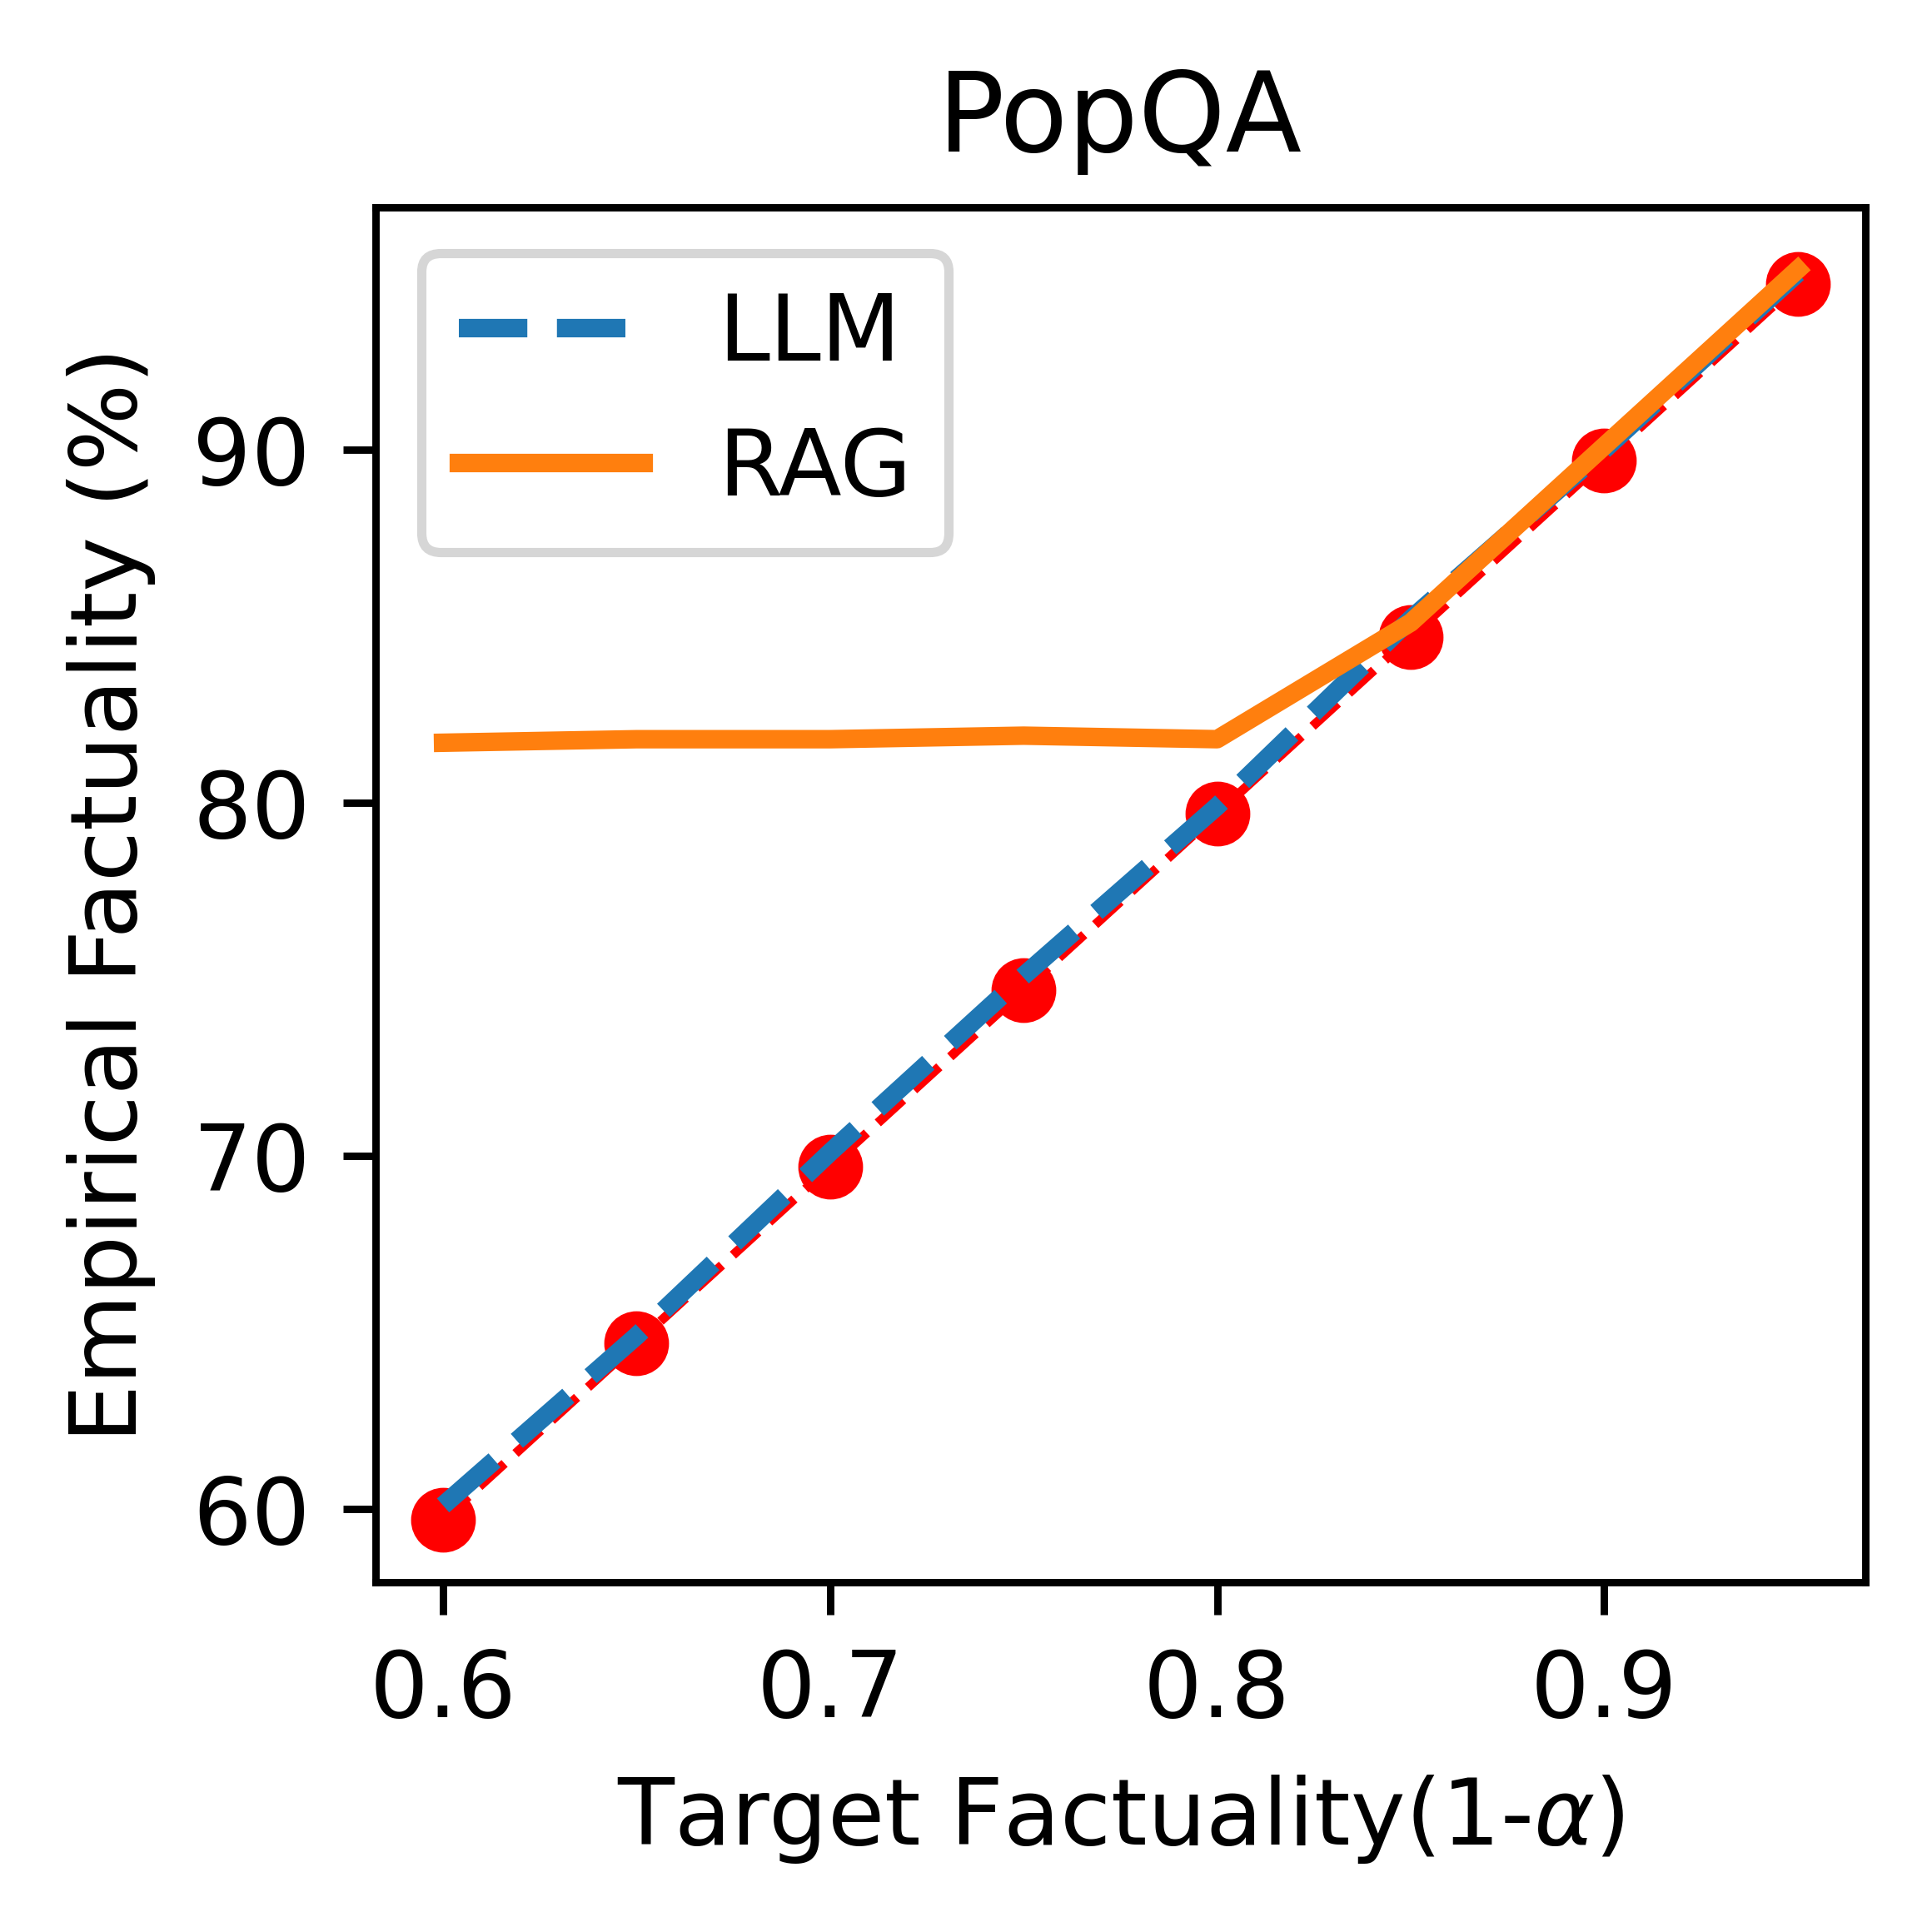

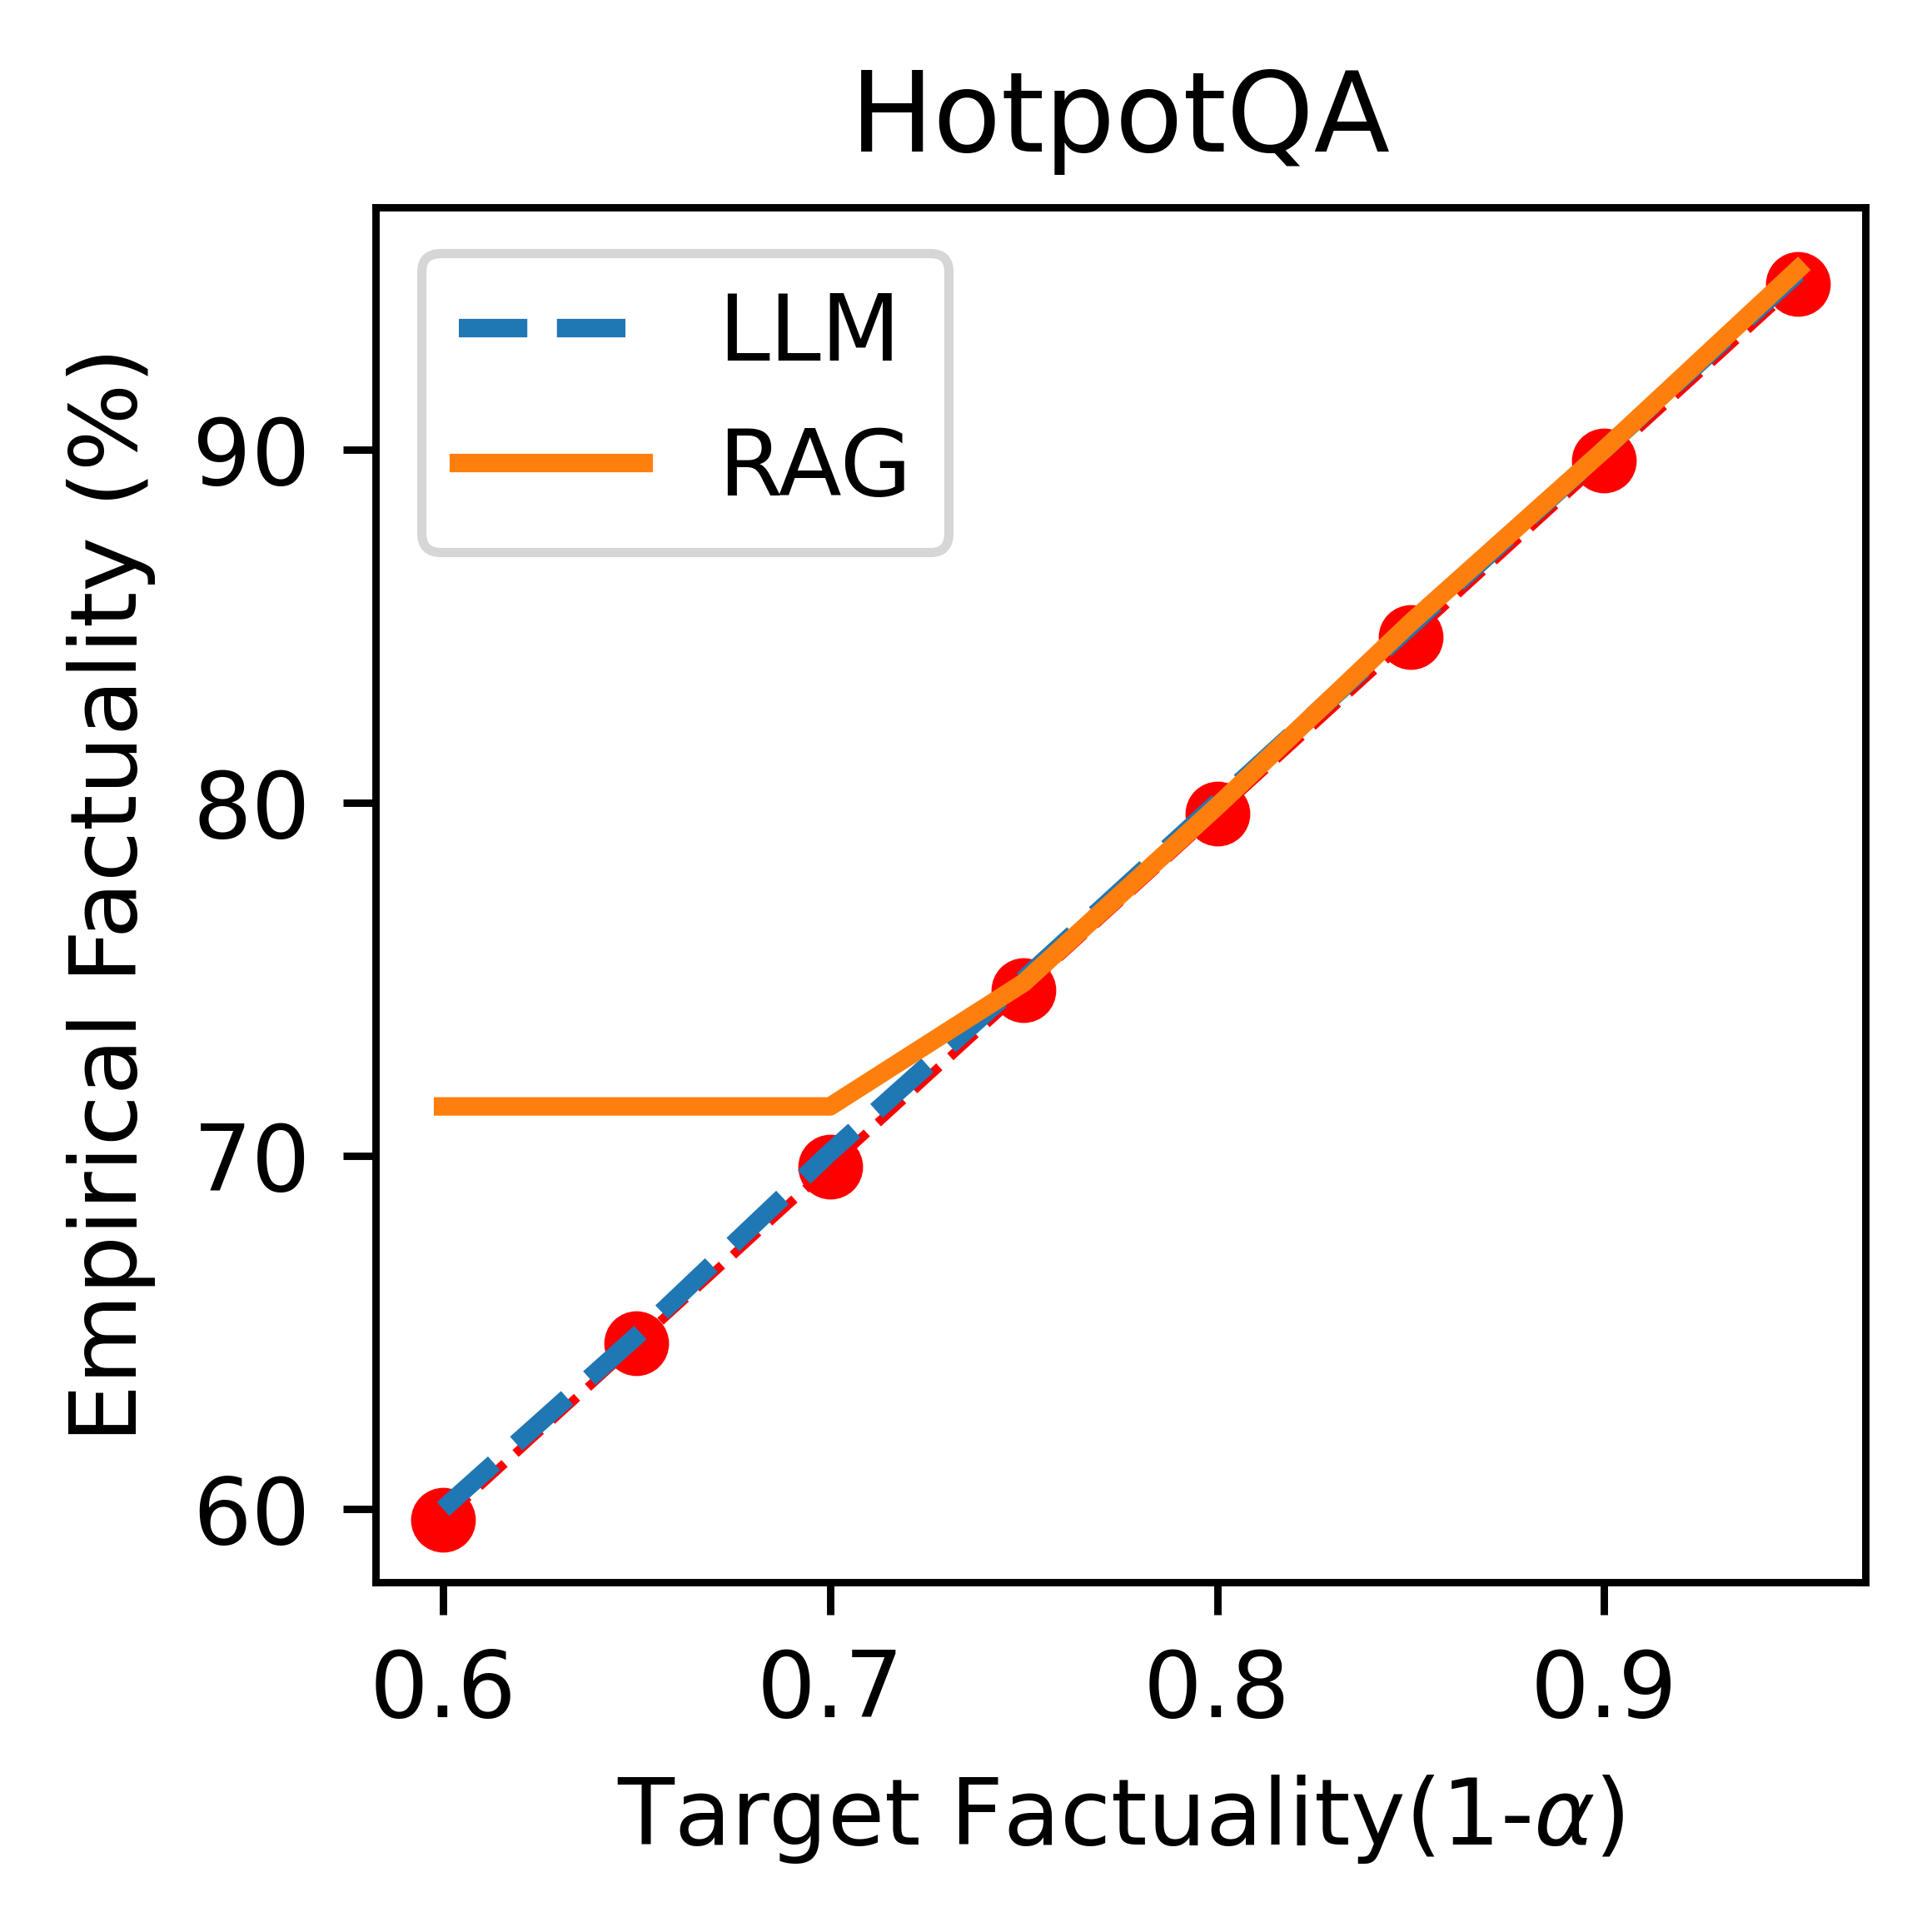

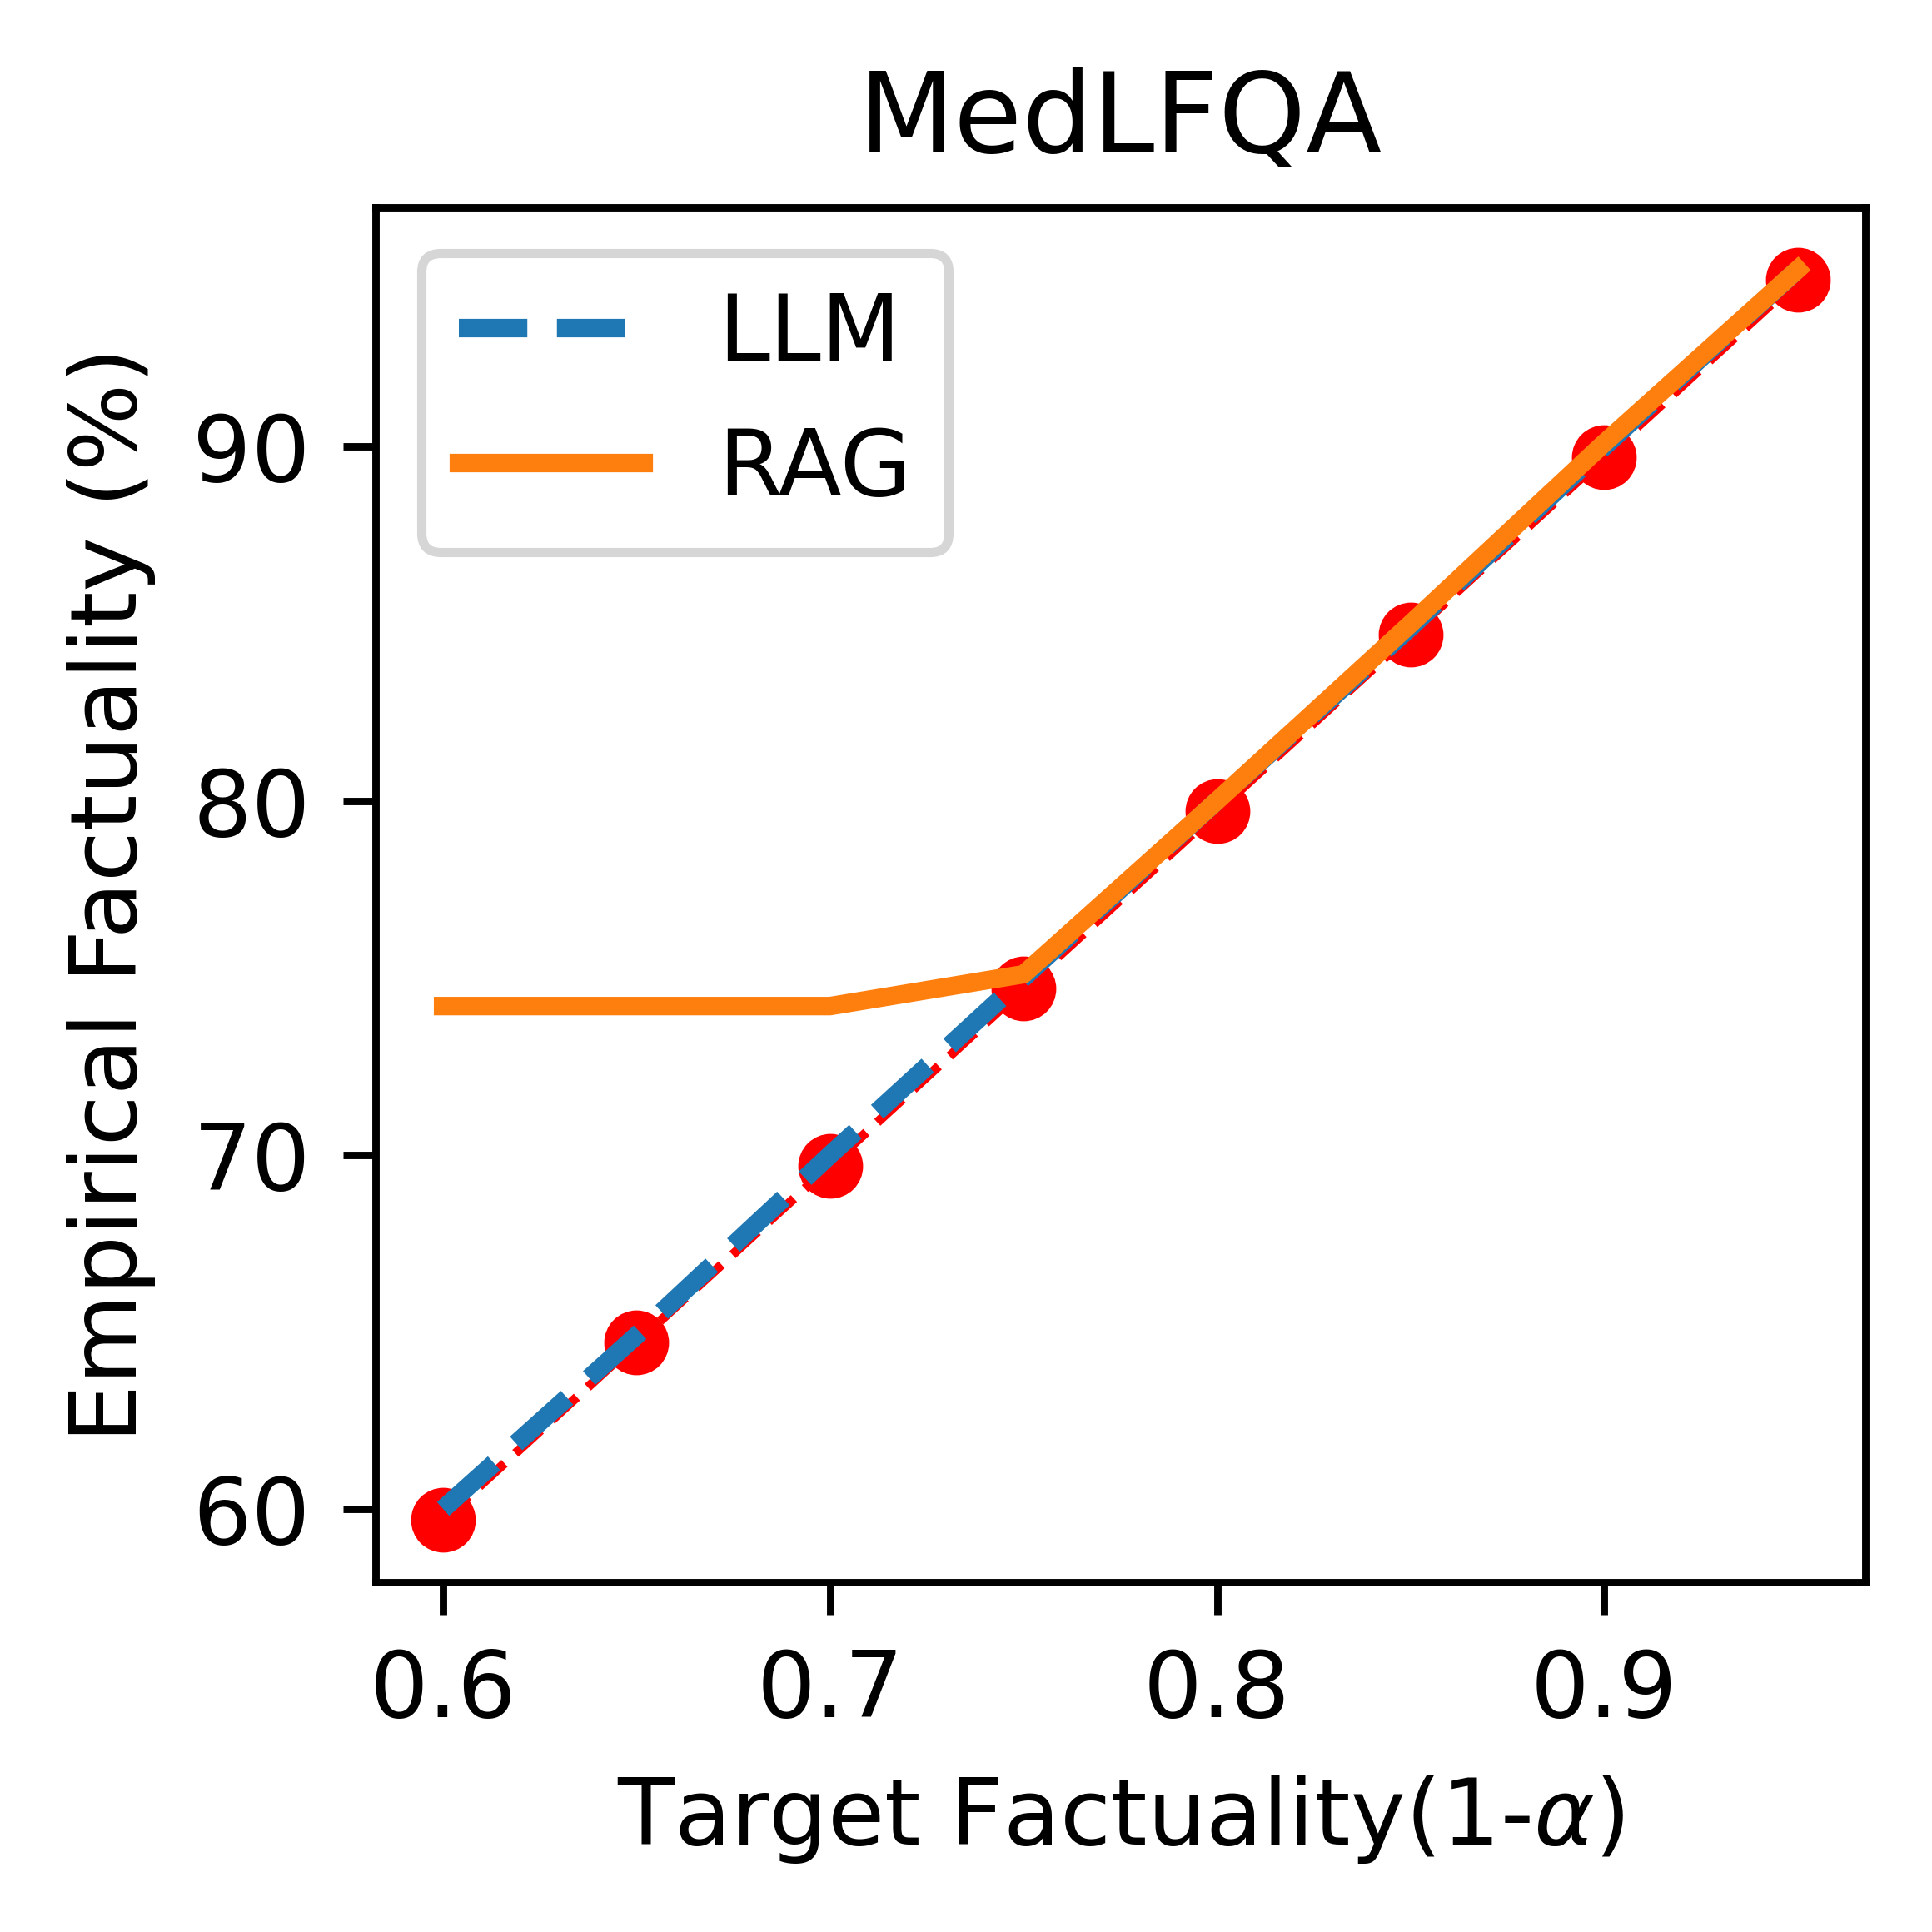

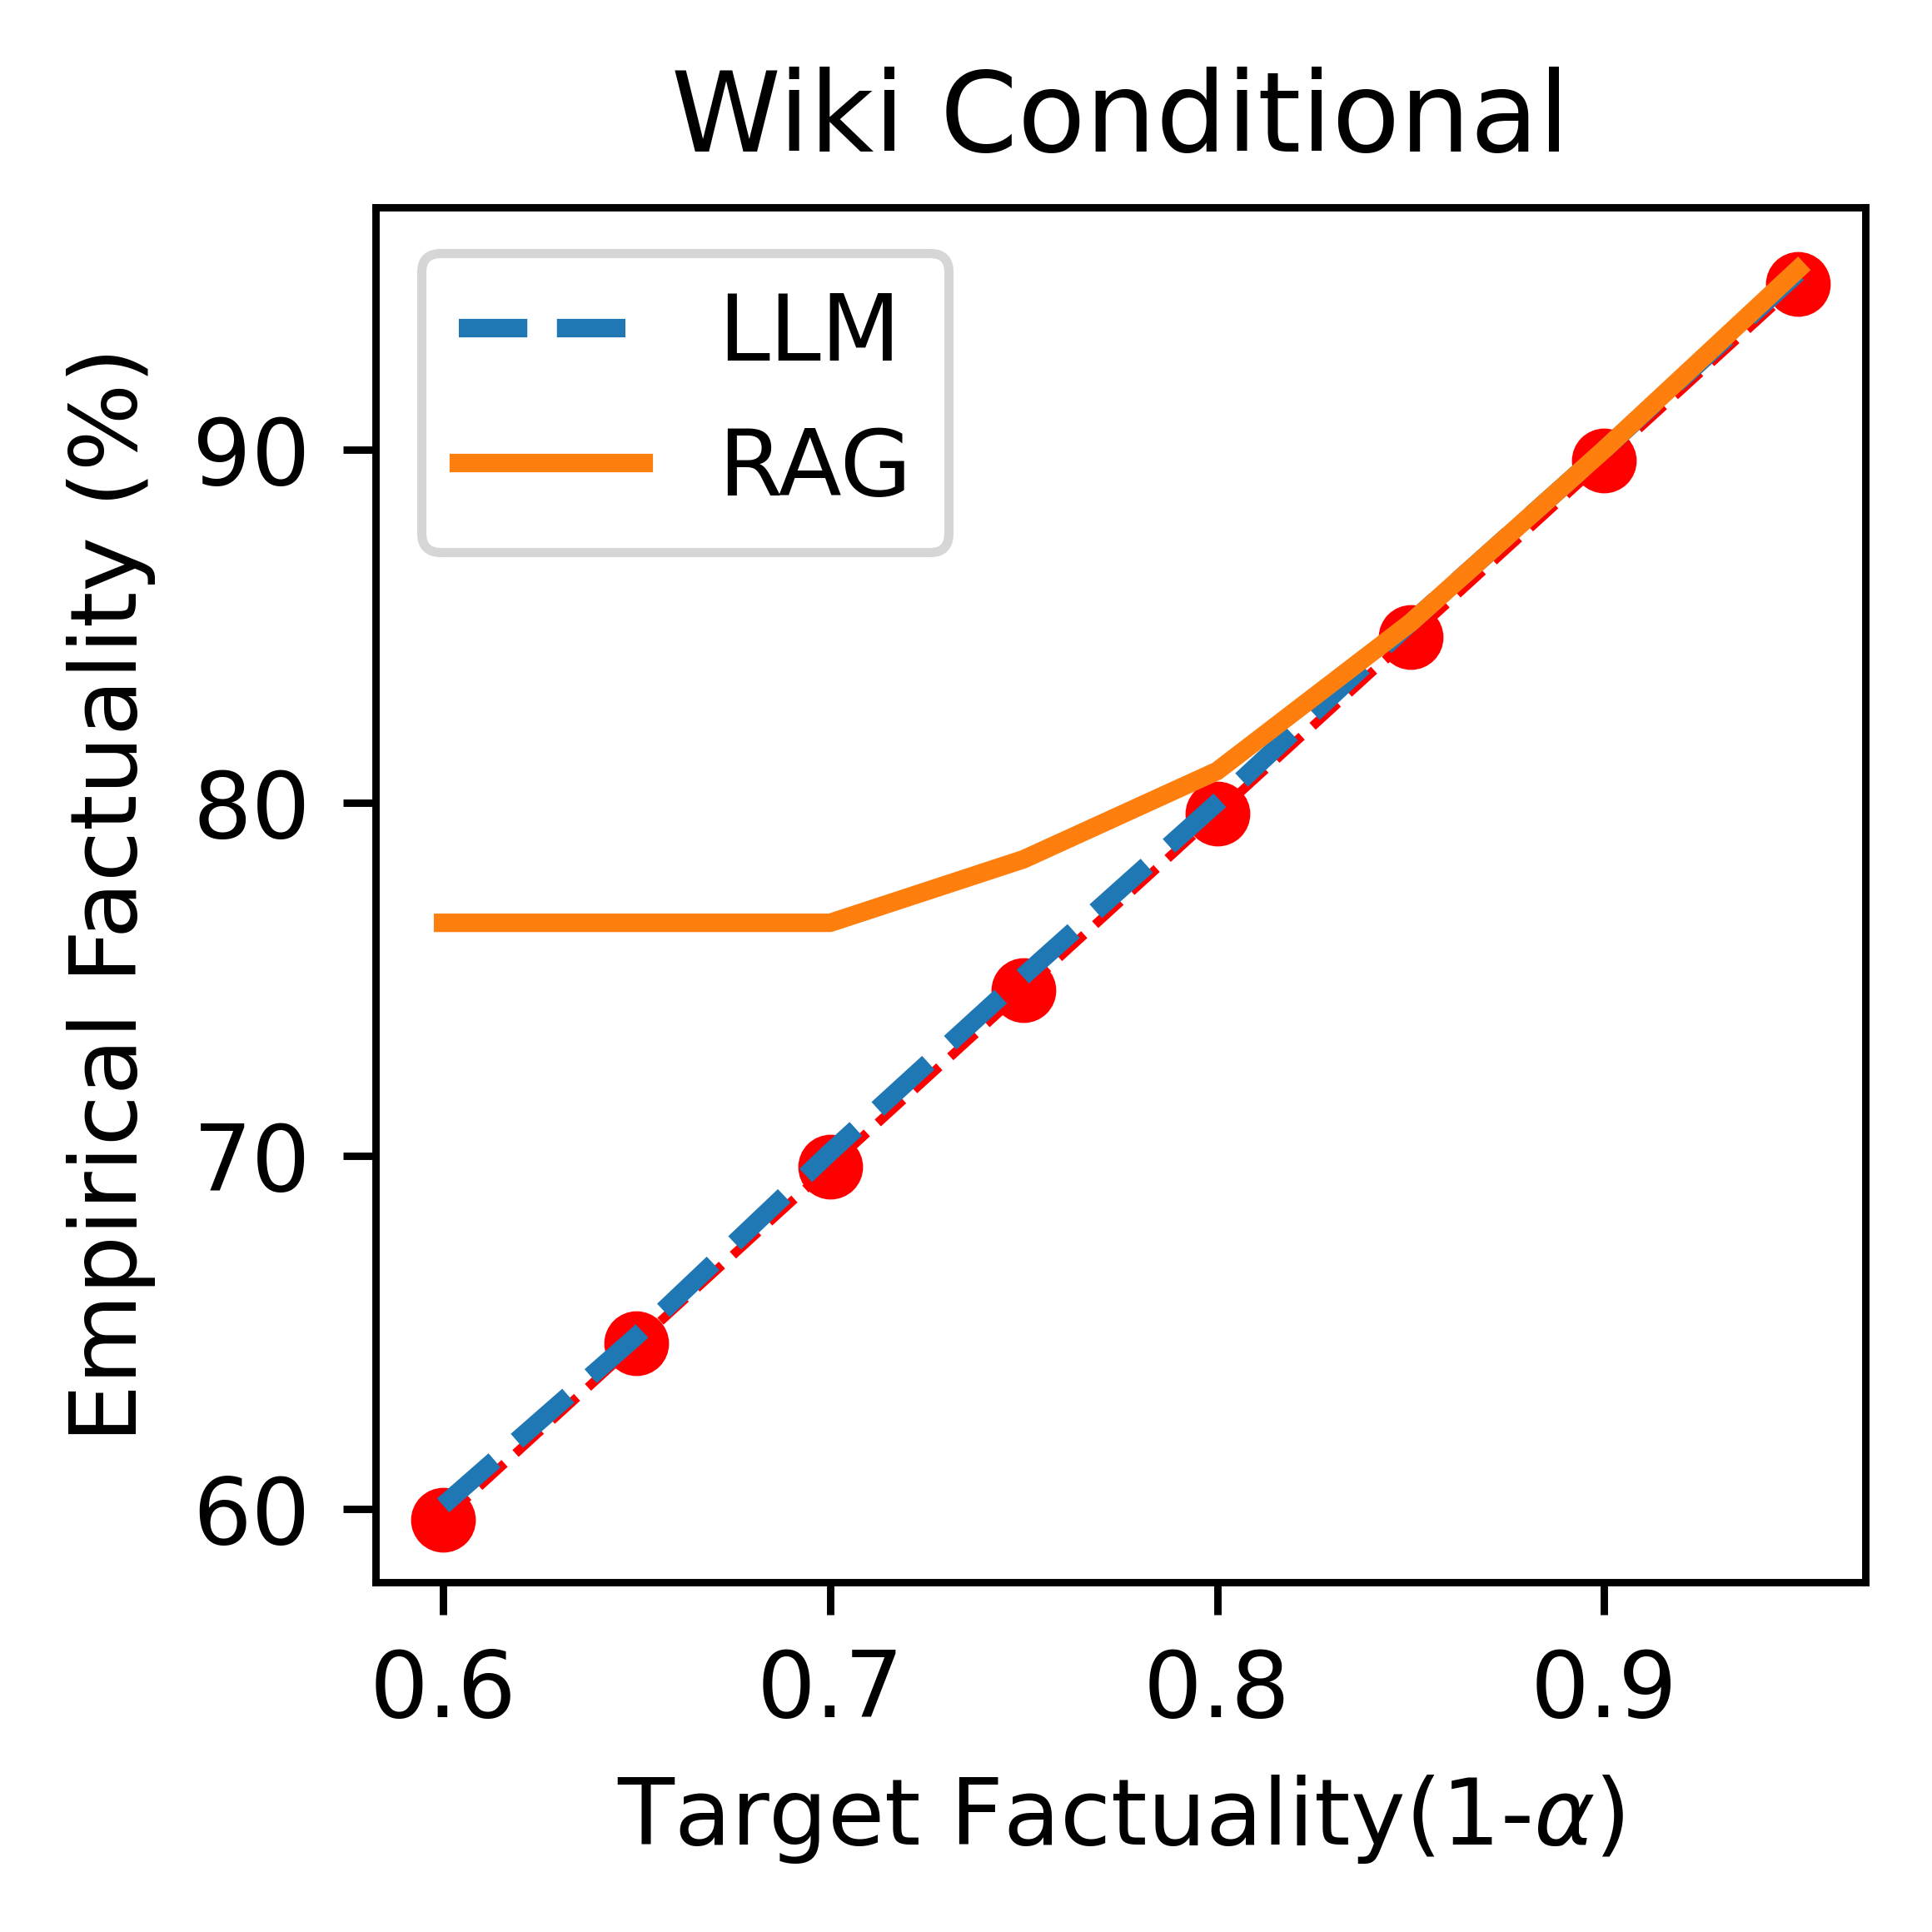

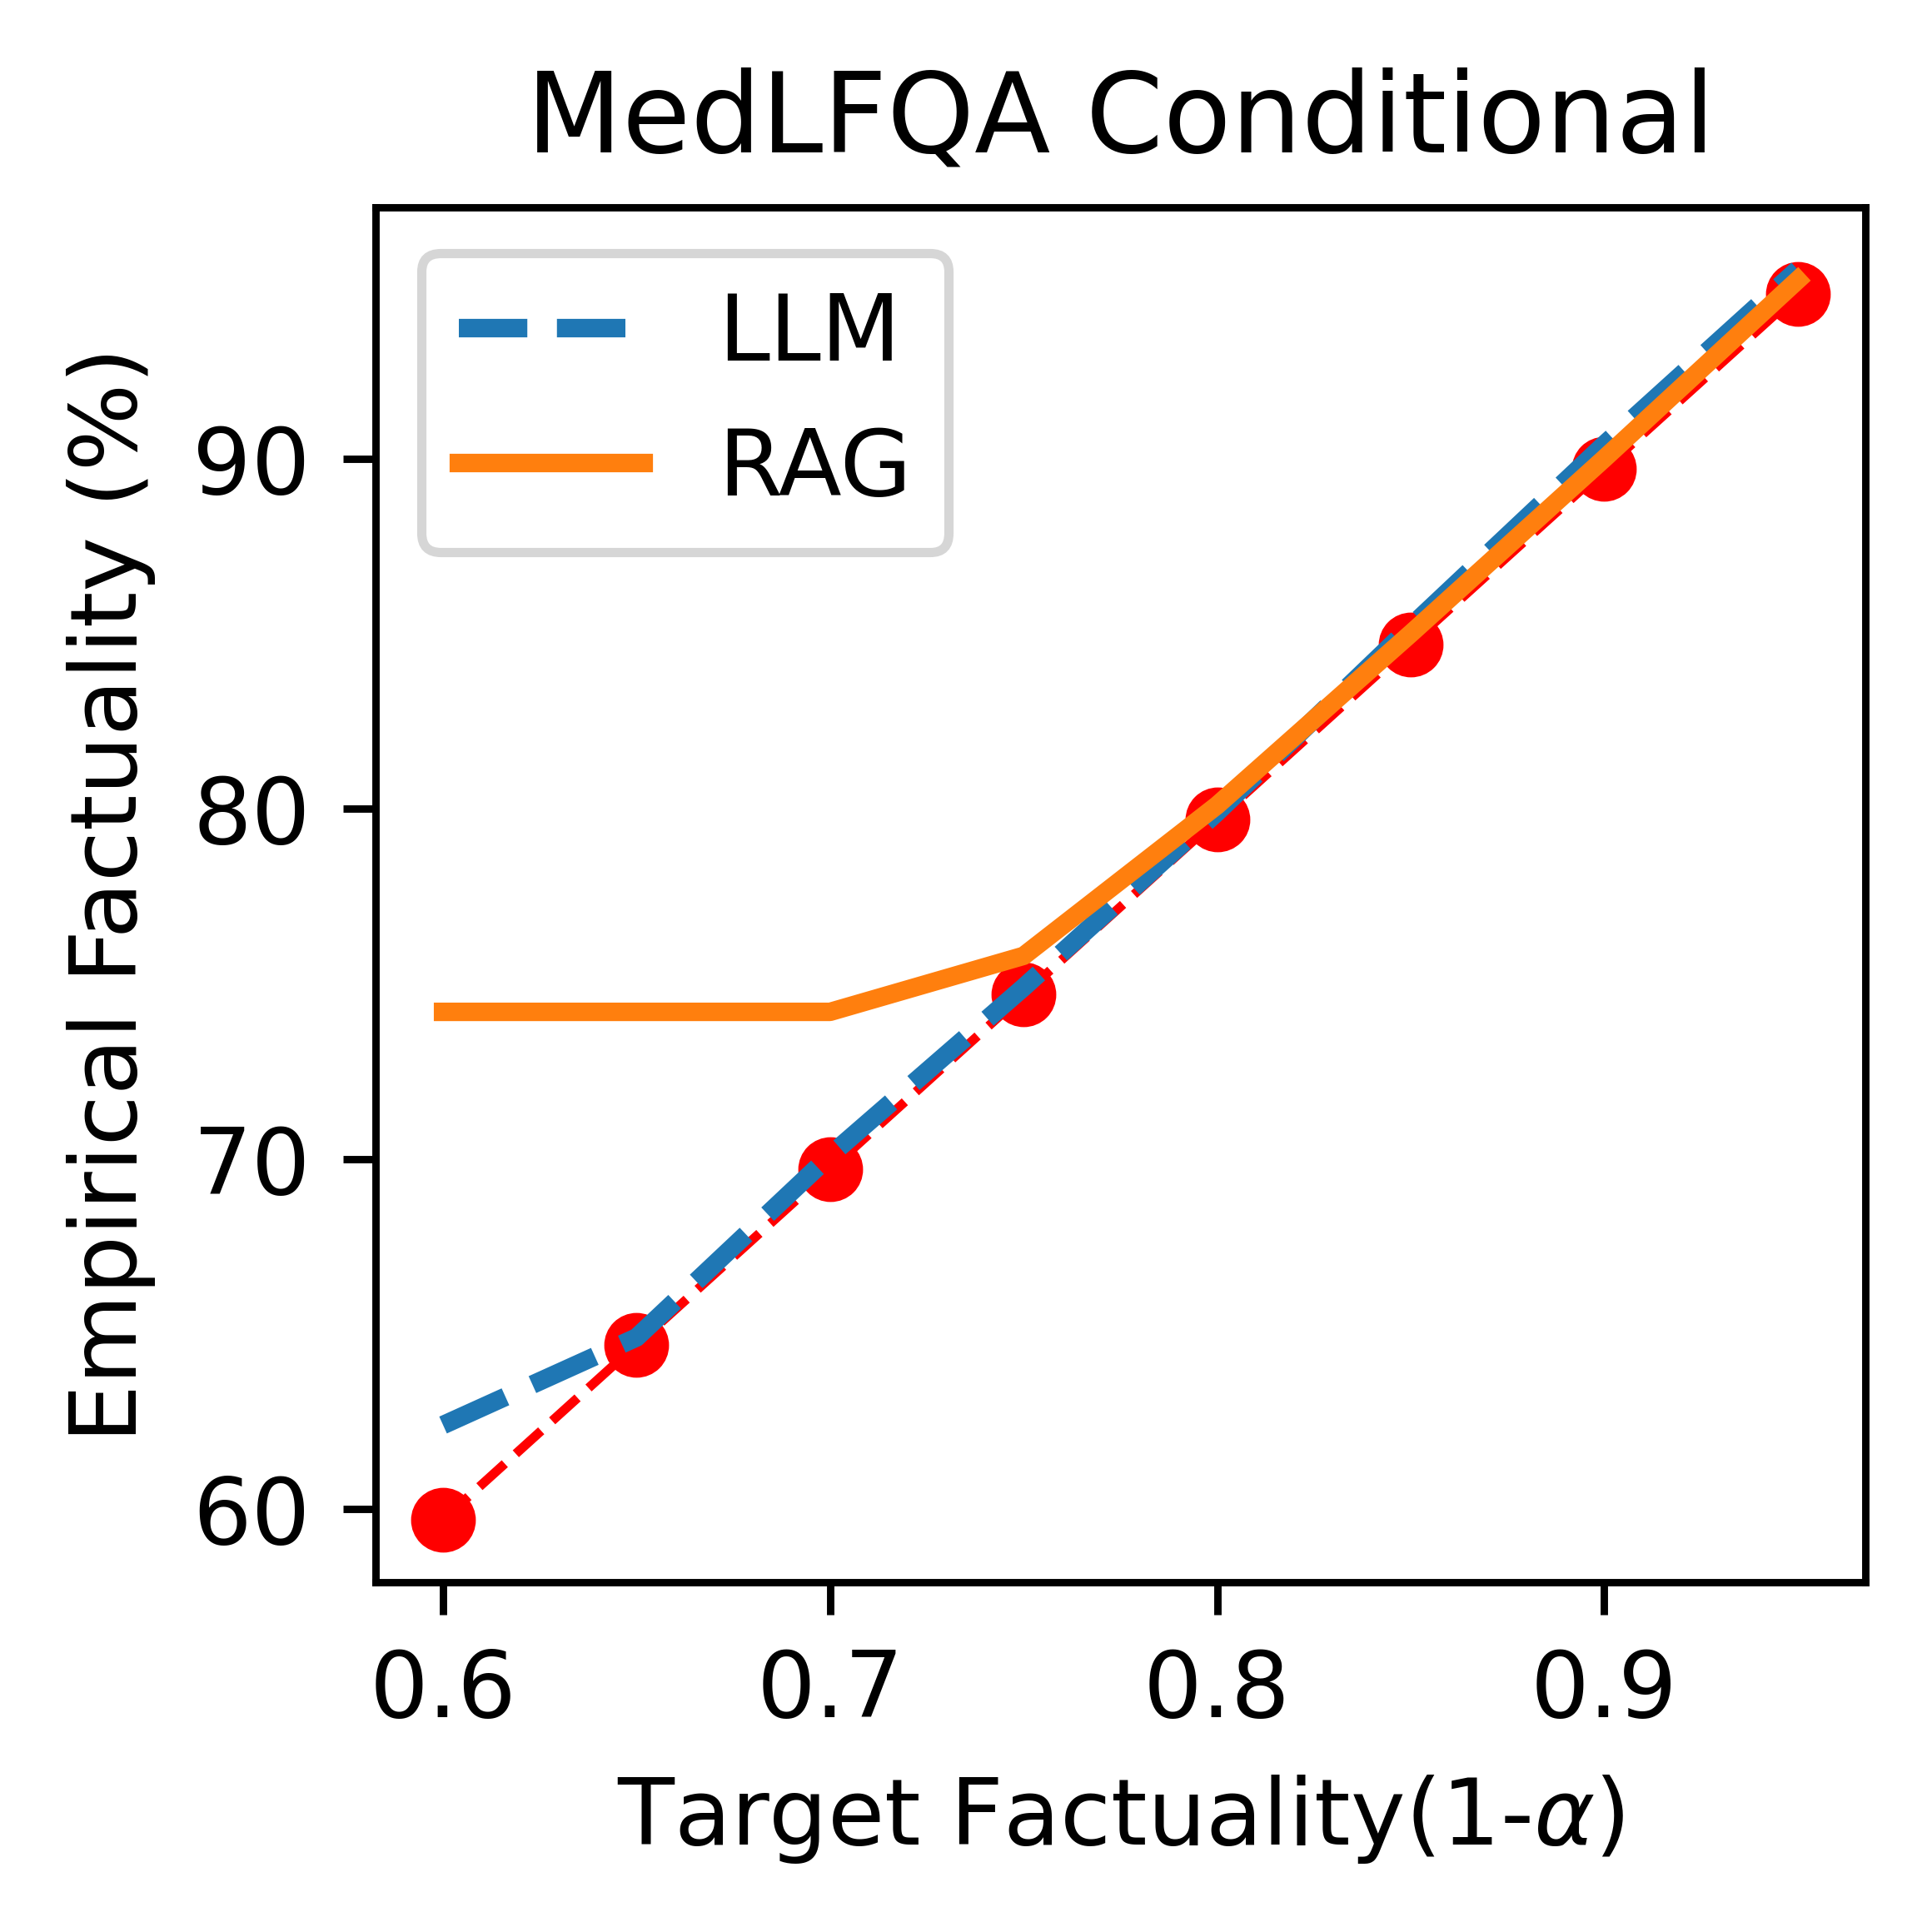

In [308]:
all = [
    ["Factscore_Conformal_LLM", "Factscore_Conformal_RAG"],
    ["Popqa_Conformal_LLM", "Popqa_Conformal_RAG"],
    ["Hotpotqa_Conformal_LLM", "Hotpotqa_Conformal_RAG"],
    ["Medlfqav2_Conformal_LLM", "Medlfqav2_Conformal_RAG"],
    ["Wiki_Conditional_Conformal_LLM", "Wiki_Conditional_Conformal_RAG"],
    ["Medlfqav2_Conditional_Conformal_LLM", "Medlfqav2_Conditional_Conformal_RAG"]
]
titles = ["FActScore", "PopQA", "HotpotQA", "MedLFQA", "Wiki Conditional", "MedLFQA Conditional"]
for i, rowname in enumerate(all):
    plot_selected_rows_factuality('/Users/naihefeng/Documents/2025/study/layer6/report/data/Factuality.csv', rowname, titles[i])

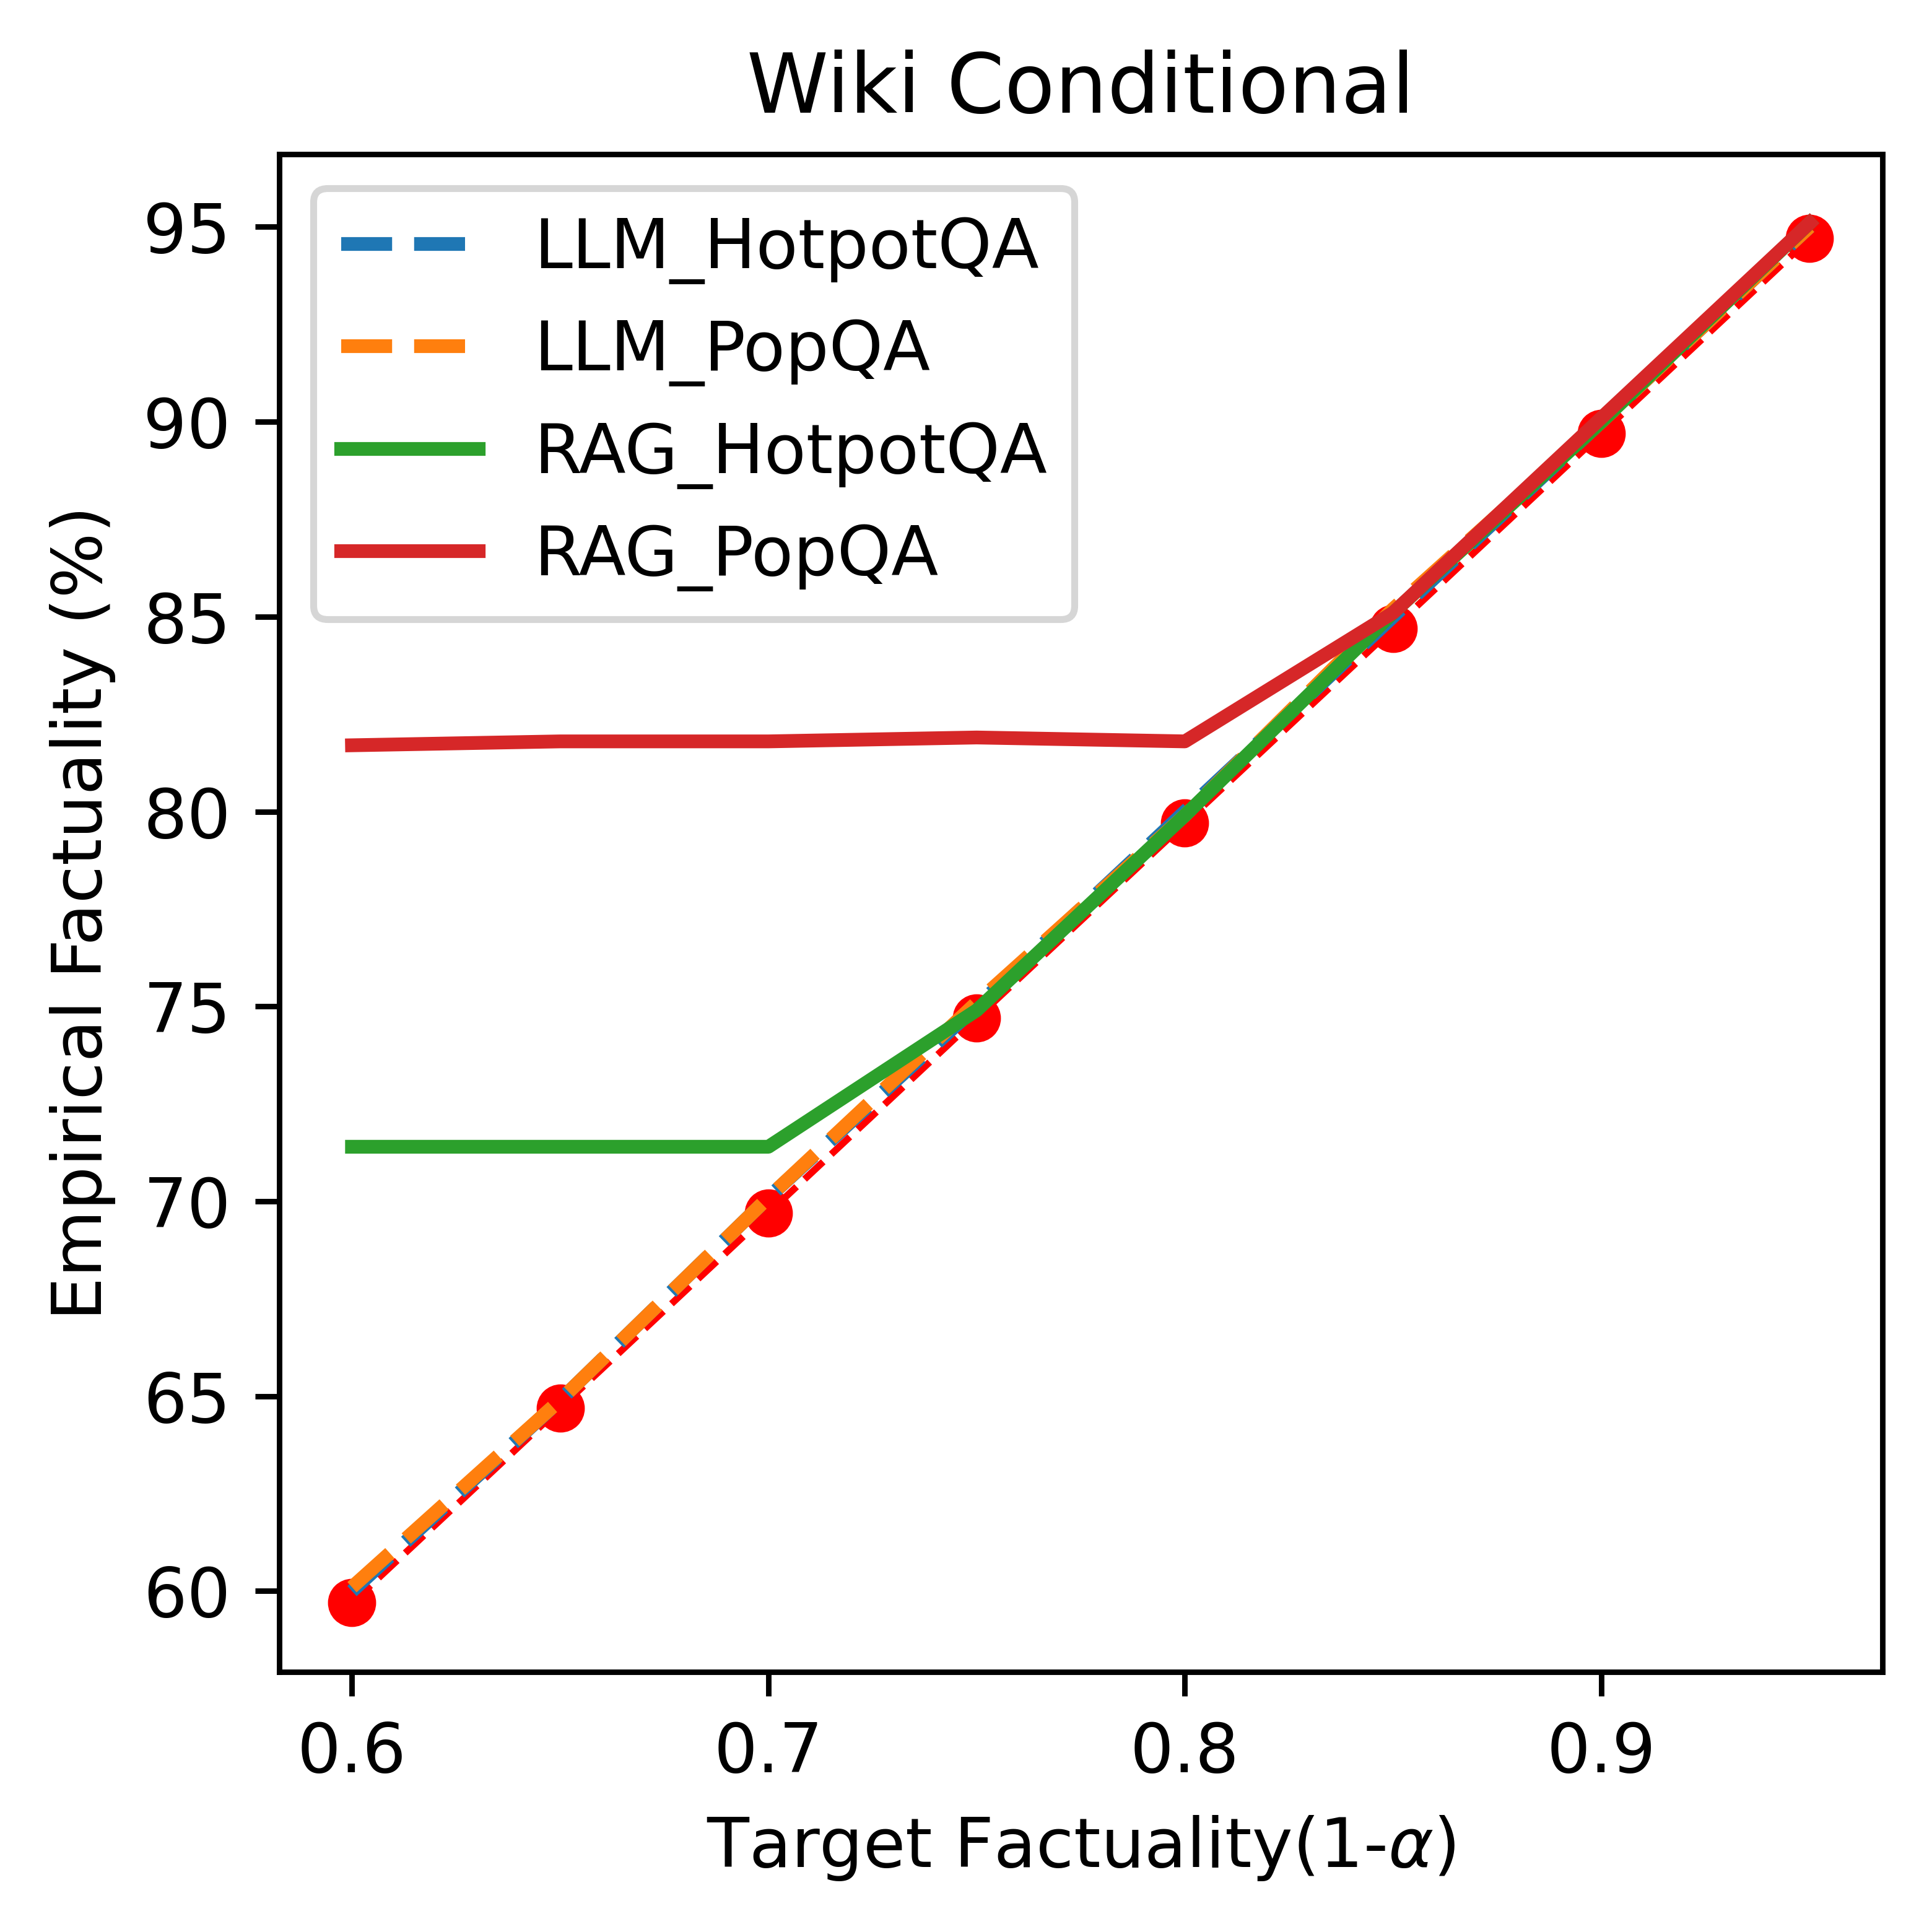

In [288]:
plot_selected_rows_factuality('/Users/naihefeng/Documents/2025/study/layer6/report/data/Factuality.csv', 
                   [
                    "Wiki_Conditional_LLM_HotpotQA", 
                    "Wiki_Conditional_LLM_PopQA",
                    "Wiki_Conditional_RAG_HotpotQA", 
                    "Wiki_Conditional_RAG_PopQA",
                ])

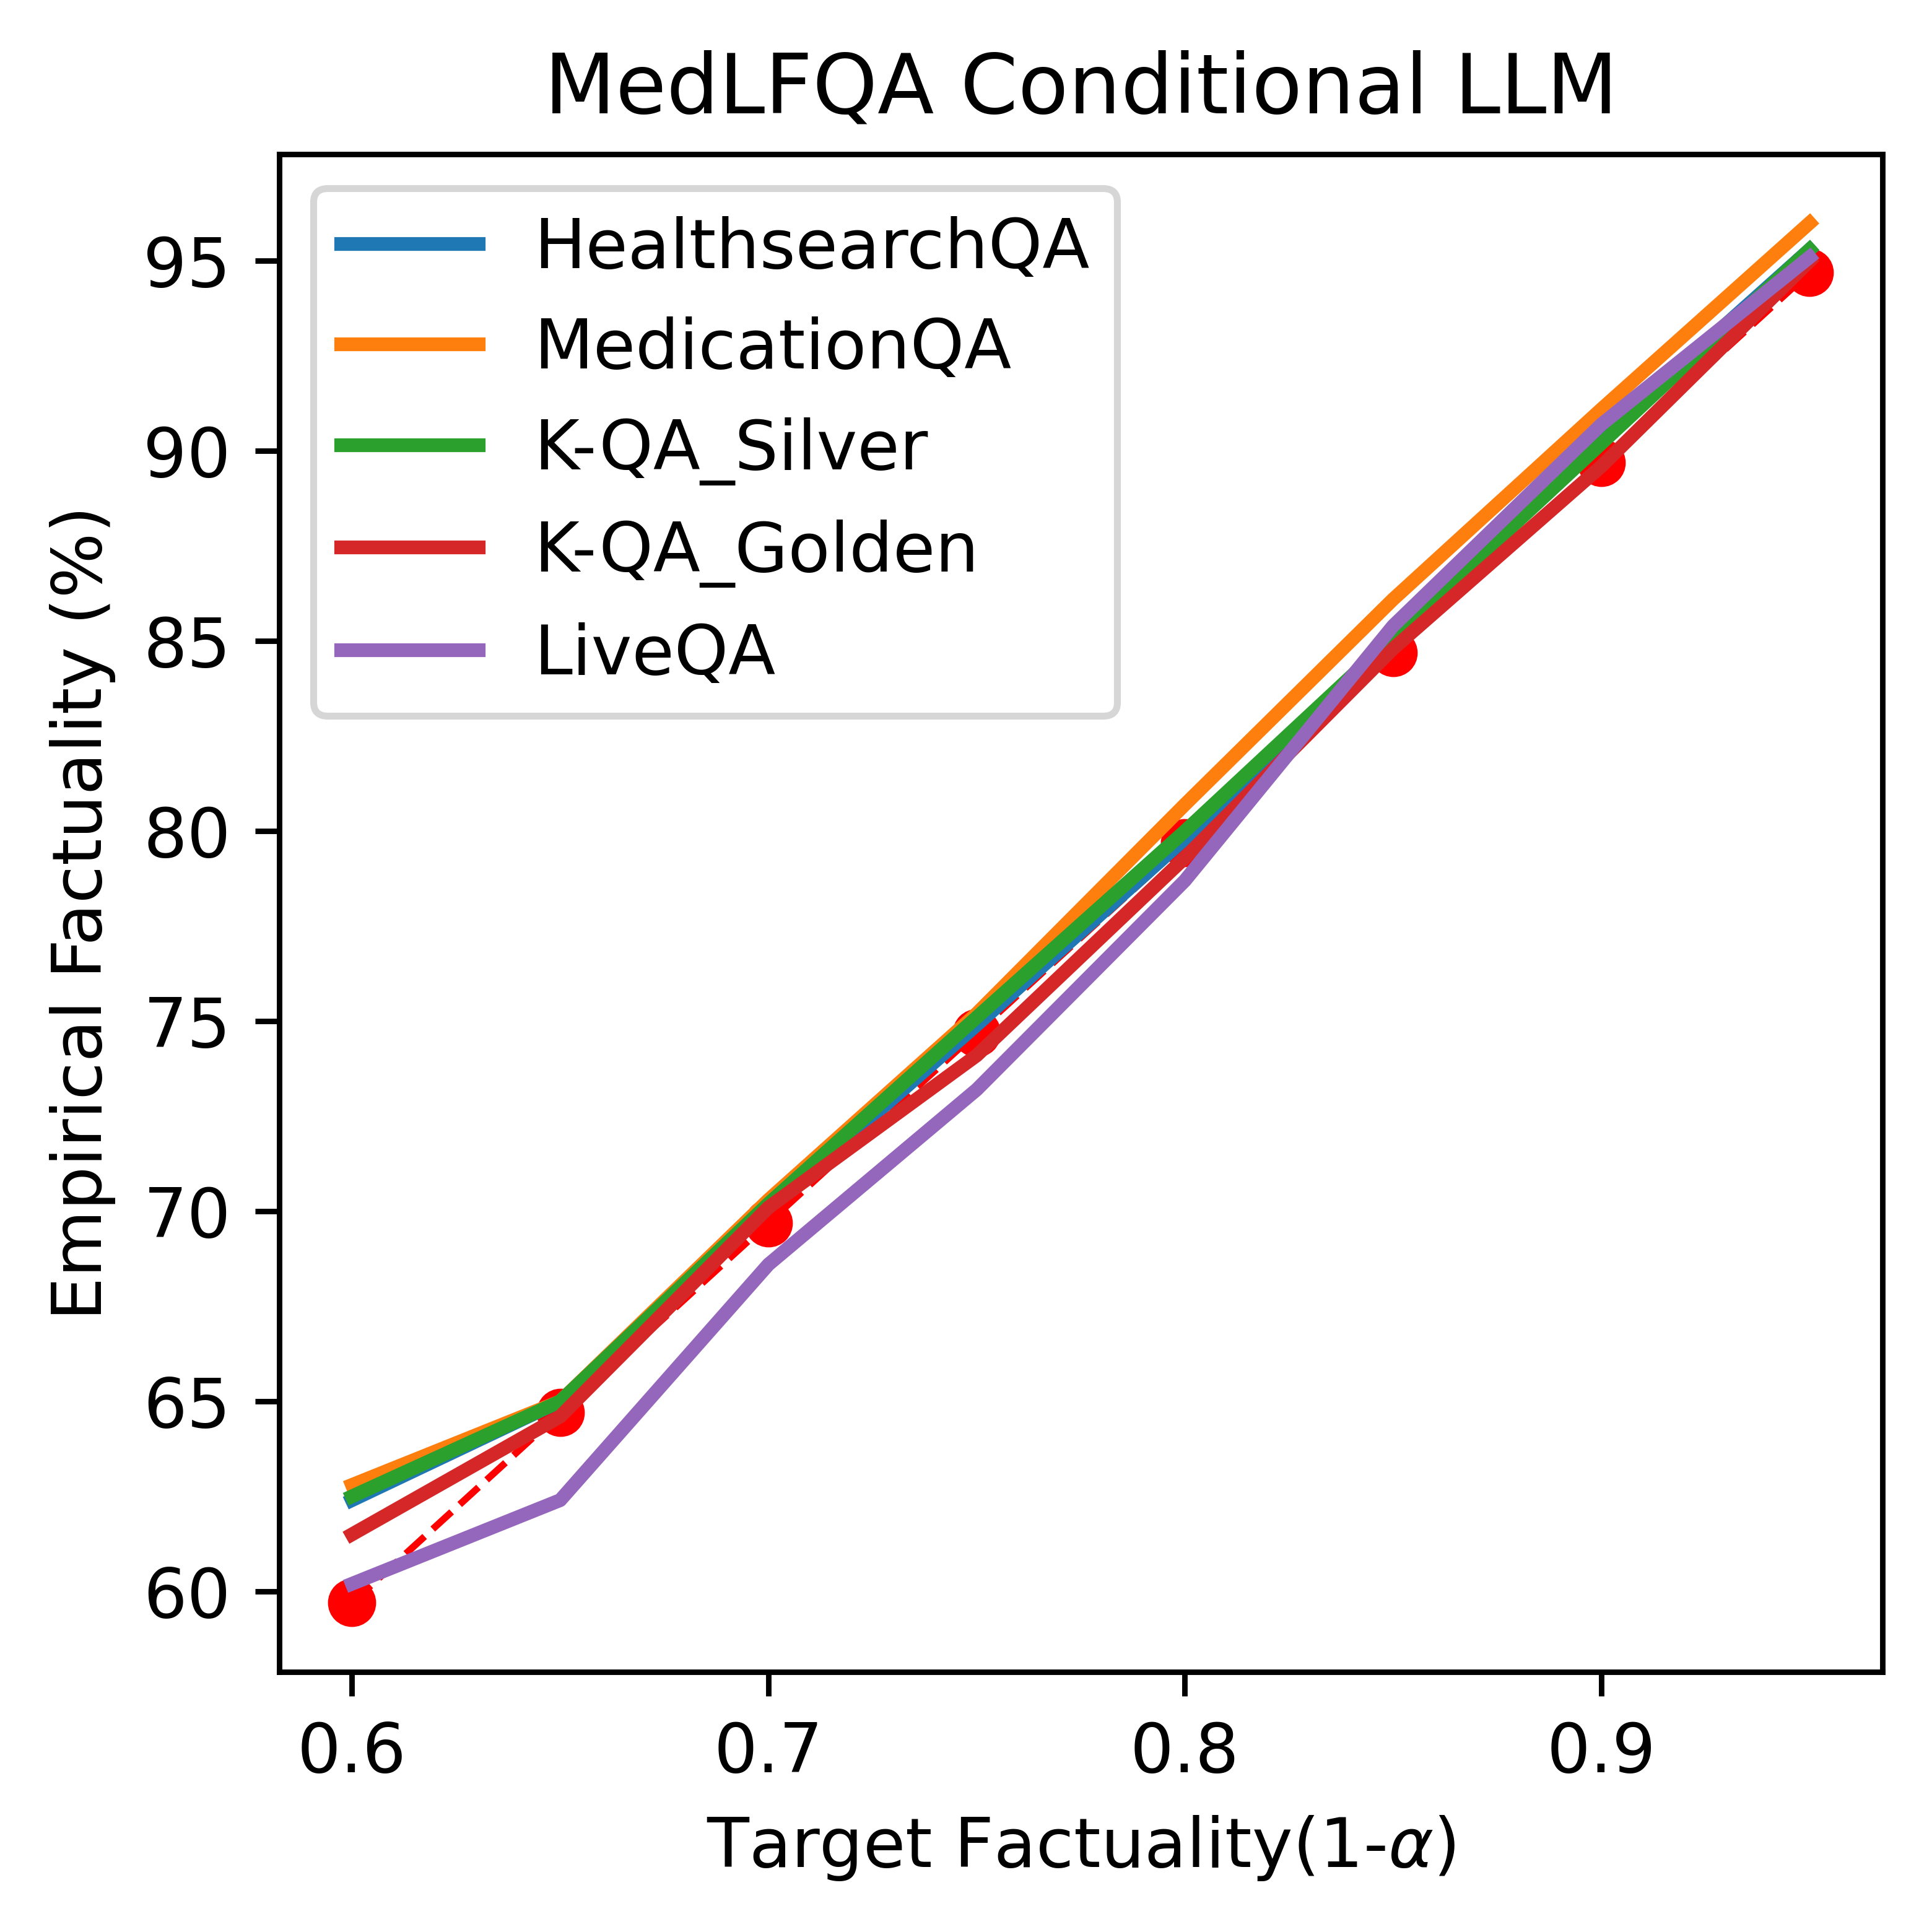

In [281]:
plot_selected_rows_factuality('/Users/naihefeng/Documents/2025/study/layer6/report/data/Factuality.csv', 
                   [ 
                    "Medlfqav2_Conditional_LLM_HealthsearchQA", 
                    "Medlfqav2_Conditional_LLM_MedicationQA",
                    "Medlfqav2_Conditional_LLM_K-QA_Silver",
                    "Medlfqav2_Conditional_LLM_K-QA_Golden",
                    "Medlfqav2_Conditional_LLM_LiveQA"])

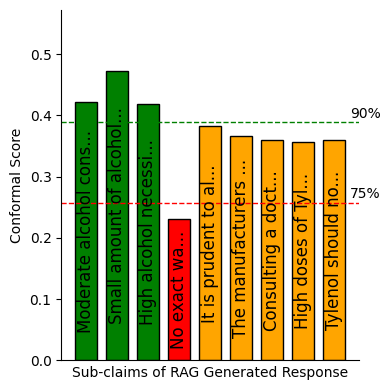

In [320]:
import matplotlib.pyplot as plt
import numpy as np

# Function to truncate text dynamically based on bar height
def truncate_text(text, bar_height, max_chars_per_unit=50):
    max_chars = int(bar_height * max_chars_per_unit)  # Scale characters by bar height
    return text[:max_chars] + "..." if len(text) > max_chars else text

# Define function for coloring bars based on score
def get_bar_color(score):
    if score >= 0.389:
        return "green"
    elif score >= 0.257:
        return "orange"
    else:
        return "red"

# Dataset
dataset = [
    {"text": "Moderate alcohol consumption is safe", "score": 0.422, "display": False, "color": "green"},
    {"text": "Small amount of alcohol is safe", "score": 0.472, "display": True, "color": "green"}, 
    {"text": "High alcohol necessitates waiting", "score": 0.419, "display": True, "color": "green"},
    {"text": "No exact wait time specified", "score": 0.231, "display": True, "color": "red"},
    {"text": "It is prudent to allow a few hours for alcohol to metabolize before taking Tylenol", "score": 0.382, "display": False, "color": "yellow"},
    {"text": "The manufacturers advise consulting with a doctor after significant alcohol consumption", "score": 0.367, "display": False, "color": "yellow"},
    {"text": "Consulting a doctor is advised", "score": 0.359, "display": True, "color": "yellow"},
    {"text": "High doses of Tylenol can increase the risk of liver damage, especially with alcohol", "score": 0.357, "display": False, "color": "yellow"},
    {"text": "Tylenol should not be taken in high doses with alcohol", "score": 0.3599016286849976, "display": False, "color": "yellow"},
]

# Sort dataset by score
#dataset.sort(key=lambda d: d["score"], reverse=True)

# Extract data for plotting
# Set bar width relative to font height
wide_scale = 0.7
font_size = 12
bar_width = 1.5 * font_size / 100  # Approximate scaling
scores = [d["score"] for d in dataset]
labels = [d["text"] if d["display"] else "" for d in dataset]
colors = [get_bar_color(d["score"]) for d in dataset]
x = np.arange(len(dataset))*wide_scale

# Plot bars
fig, ax = plt.subplots(figsize=(4, 4))
bar_container = ax.bar(x, scores, color=colors, width=0.5, edgecolor='black')

# Add text labels
for i, d in enumerate(dataset):
    truncated_text = truncate_text(d["text"], d["score"])
    ax.text(i*wide_scale, d["score"] / 2, truncated_text, ha="center", va="center", rotation=90, fontsize=font_size, color="black")

# Add horizontal dashed lines at y1 = 0.257 and y2 = 0.389 with labels of t_75% and t_90%
ax.axhline(y=0.257, color='red', linestyle='dashed', linewidth=1)
ax.axhline(y=0.389, color='green', linestyle='dashed', linewidth=1)
ax.text(8.5*wide_scale, 0.265, '75%', color='black', fontsize=10)
ax.text(8.5*wide_scale, 0.395, '90%', color='black', fontsize=10)

#vertical lines
#ax.axvline(x=2.5, color='green', linestyle='dashed', linewidth=1)
#ax.axvline(x=len(dataset) - 1.5, color='red', linestyle='dashed', linewidth=1)

# Add category labels
#ax.text(1, 0.5, 'High', color='green', fontsize=12, fontweight='bold')
#ax.text(4.5, 0.5, 'Medium', color='#F0C832', fontsize=12, fontweight='bold')
#ax.text(len(dataset)-1.1, 0.5, 'Low', color='red', fontsize=12, fontweight='bold')

# Formatting
ax.set_xticks([])  # Remove x-ticks
ax.set_ylabel("Conformal Score")
ax.set_xlabel("Sub-claims of RAG Generated Response")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(0, max(scores) + 0.1)
plt.tight_layout()
plt.savefig("calibration.pdf", format="pdf")
plt.show()
